In [2]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train , y_train) , (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

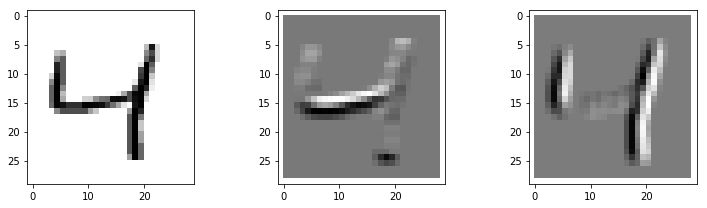

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1],
                   [1,1,1],
                   [-2,-2,-2]],dtype = float)
myfil2 = np.array([[-2,1,1],
                   [-2,1,1],
                   [-2,1,1]], dtype = float)

x_img = x_train[id_img, : ,  : , 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h,img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# フィルター処理
for ih in range(img_h-3):
    for iw in range(img_w-3):
        img_part = x_img[ih:ih + 3, iw:iw+3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1),myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1),myfil2.reshape(-1))
        
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

In [5]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3,3) , padding='same',
                 input_shape=(28,28,1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000,epochs = 20,verbose=1, validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:' , score[0])
print('Test accuracy:' , score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


 1000/60000 [..............................] - ETA: 23s - loss: 2.3118 - acc: 0.1020

 2000/60000 [>.............................] - ETA: 13s - loss: 2.2597 - acc: 0.1920

 3000/60000 [>.............................] - ETA: 10s - loss: 2.2005 - acc: 0.2777

 4000/60000 [=>............................] - ETA: 8s - loss: 2.1429 - acc: 0.3407 

 5000/60000 [=>............................] - ETA: 7s - loss: 2.0901 - acc: 0.3828

 6000/60000 [==>...........................] - ETA: 7s - loss: 2.0331 - acc: 0.4350

 7000/60000 [==>...........................] - ETA: 6s - loss: 1.9777 - acc: 0.4737

 8000/60000 [===>..........................] - ETA: 6s - loss: 1.9256 - acc: 0.5069

 9000/60000 [===>..........................] - ETA: 6s - loss: 1.8743 - acc: 0.5334

10000/60000 [====>.........................] - ETA: 5s - loss: 1.8208 - acc: 0.5596

11000/60000 [====>.........................] - ETA: 5s - loss: 1.7725 - acc: 0.5786

12000/60000 [=====>........................] - ETA: 5s - loss: 1.7265 - acc: 0.5953

13000/60000 [=====>........................] - ETA: 5s - loss: 1.6828 - acc: 0.6101

14000/60000 [======>.......................] - ETA: 4s - loss: 1.6374 - acc: 0.6250

15000/60000 [======>.......................] - ETA: 4s - loss: 1.5945 - acc: 0.6381

16000/60000 [=======>......................] - ETA: 4s - loss: 1.5516 - acc: 0.6507

17000/60000 [=======>......................] - ETA: 4s - loss: 1.5128 - acc: 0.6602

18000/60000 [========>.....................] - ETA: 4s - loss: 1.4781 - acc: 0.6679

19000/60000 [========>.....................] - ETA: 4s - loss: 1.4406 - acc: 0.6772

20000/60000 [=========>....................] - ETA: 3s - loss: 1.4074 - acc: 0.6849

21000/60000 [=========>....................] - ETA: 3s - loss: 1.3768 - acc: 0.6904

22000/60000 [==========>...................] - ETA: 3s - loss: 1.3445 - acc: 0.6974

23000/60000 [==========>...................] - ETA: 3s - loss: 1.3157 - acc: 0.7029

24000/60000 [===========>..................] - ETA: 3s - loss: 1.2880 - acc: 0.7081

25000/60000 [===========>..................] - ETA: 3s - loss: 1.2596 - acc: 0.7142

26000/60000 [============>.................] - ETA: 3s - loss: 1.2342 - acc: 0.7198

27000/60000 [============>.................] - ETA: 3s - loss: 1.2091 - acc: 0.7250

28000/60000 [=============>................] - ETA: 2s - loss: 1.1864 - acc: 0.7295

29000/60000 [=============>................] - ETA: 2s - loss: 1.1653 - acc: 0.7333

30000/60000 [==============>...............] - ETA: 2s - loss: 1.1459 - acc: 0.7365

31000/60000 [==============>...............] - ETA: 2s - loss: 1.1238 - acc: 0.7416

32000/60000 [===============>..............] - ETA: 2s - loss: 1.1049 - acc: 0.7453

33000/60000 [===============>..............] - ETA: 2s - loss: 1.0873 - acc: 0.7487

34000/60000 [================>.............] - ETA: 2s - loss: 1.0699 - acc: 0.7522

35000/60000 [================>.............] - ETA: 2s - loss: 1.0521 - acc: 0.7557

36000/60000 [=================>............] - ETA: 2s - loss: 1.0348 - acc: 0.7592

37000/60000 [=================>............] - ETA: 2s - loss: 1.0210 - acc: 0.7619

38000/60000 [==================>...........] - ETA: 1s - loss: 1.0068 - acc: 0.7648

39000/60000 [==================>...........] - ETA: 1s - loss: 0.9922 - acc: 0.7676

40000/60000 [===================>..........] - ETA: 1s - loss: 0.9775 - acc: 0.7707

41000/60000 [===================>..........] - ETA: 1s - loss: 0.9635 - acc: 0.7737

42000/60000 [====================>.........] - ETA: 1s - loss: 0.9502 - acc: 0.7765

43000/60000 [====================>.........] - ETA: 1s - loss: 0.9365 - acc: 0.7795

44000/60000 [=====================>........] - ETA: 1s - loss: 0.9244 - acc: 0.7821

45000/60000 [=====================>........] - ETA: 1s - loss: 0.9129 - acc: 0.7844

46000/60000 [======================>.......] - ETA: 1s - loss: 0.9025 - acc: 0.7865

47000/60000 [======================>.......] - ETA: 1s - loss: 0.8916 - acc: 0.7886

48000/60000 [=======================>......] - ETA: 1s - loss: 0.8809 - acc: 0.7909

49000/60000 [=======================>......] - ETA: 0s - loss: 0.8706 - acc: 0.7931

50000/60000 [========================>.....] - ETA: 0s - loss: 0.8605 - acc: 0.7951

51000/60000 [========================>.....] - ETA: 0s - loss: 0.8506 - acc: 0.7972

52000/60000 [=========================>....] - ETA: 0s - loss: 0.8418 - acc: 0.7991

53000/60000 [=========================>....] - ETA: 0s - loss: 0.8333 - acc: 0.8007

54000/60000 [==========================>...] - ETA: 0s - loss: 0.8253 - acc: 0.8023

55000/60000 [==========================>...] - ETA: 0s - loss: 0.8172 - acc: 0.8040

56000/60000 [===========================>..] - ETA: 0s - loss: 0.8091 - acc: 0.8056

57000/60000 [===========================>..] - ETA: 0s - loss: 0.8008 - acc: 0.8074

58000/60000 [============================>.] - ETA: 0s - loss: 0.7933 - acc: 0.8090

59000/60000 [============================>.] - ETA: 0s - loss: 0.7864 - acc: 0.8103

60000/60000 [==============================] - 5s 91us/step - loss: 0.7798 - acc: 0.8116 - val_loss: 0.3392 - val_acc: 0.9042


Epoch 2/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.3522 - acc: 0.9070

 2000/60000 [>.............................] - ETA: 4s - loss: 0.3735 - acc: 0.8960

 3000/60000 [>.............................] - ETA: 4s - loss: 0.3605 - acc: 0.8973

 4000/60000 [=>............................] - ETA: 4s - loss: 0.3549 - acc: 0.8995

 5000/60000 [=>............................] - ETA: 4s - loss: 0.3558 - acc: 0.8978

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.3478 - acc: 0.9005

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.3480 - acc: 0.8991

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.3445 - acc: 0.8995

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.3463 - acc: 0.8992

10000/60000 [====>.........................] - ETA: 4s - loss: 0.3433 - acc: 0.8993

11000/60000 [====>.........................] - ETA: 3s - loss: 0.3402 - acc: 0.9001

12000/60000 [=====>........................] - ETA: 3s - loss: 0.3420 - acc: 0.9006

13000/60000 [=====>........................] - ETA: 3s - loss: 0.3386 - acc: 0.9016

14000/60000 [======>.......................] - ETA: 3s - loss: 0.3392 - acc: 0.9010

15000/60000 [======>.......................] - ETA: 3s - loss: 0.3372 - acc: 0.9019

16000/60000 [=======>......................] - ETA: 3s - loss: 0.3355 - acc: 0.9031

17000/60000 [=======>......................] - ETA: 3s - loss: 0.3394 - acc: 0.9022

18000/60000 [========>.....................] - ETA: 3s - loss: 0.3425 - acc: 0.9019

19000/60000 [========>.....................] - ETA: 3s - loss: 0.3423 - acc: 0.9008

20000/60000 [=========>....................] - ETA: 3s - loss: 0.3415 - acc: 0.9013

21000/60000 [=========>....................] - ETA: 3s - loss: 0.3389 - acc: 0.9022

22000/60000 [==========>...................] - ETA: 2s - loss: 0.3379 - acc: 0.9026

23000/60000 [==========>...................] - ETA: 2s - loss: 0.3382 - acc: 0.9023

24000/60000 [===========>..................] - ETA: 2s - loss: 0.3358 - acc: 0.9034

25000/60000 [===========>..................] - ETA: 2s - loss: 0.3345 - acc: 0.9035

26000/60000 [============>.................] - ETA: 2s - loss: 0.3341 - acc: 0.9036

27000/60000 [============>.................] - ETA: 2s - loss: 0.3331 - acc: 0.9043

28000/60000 [=============>................] - ETA: 2s - loss: 0.3318 - acc: 0.9048

29000/60000 [=============>................] - ETA: 2s - loss: 0.3308 - acc: 0.9050

30000/60000 [==============>...............] - ETA: 2s - loss: 0.3315 - acc: 0.9047

31000/60000 [==============>...............] - ETA: 2s - loss: 0.3303 - acc: 0.9052

32000/60000 [===============>..............] - ETA: 2s - loss: 0.3303 - acc: 0.9052

33000/60000 [===============>..............] - ETA: 2s - loss: 0.3277 - acc: 0.9059

34000/60000 [================>.............] - ETA: 2s - loss: 0.3268 - acc: 0.9066

35000/60000 [================>.............] - ETA: 1s - loss: 0.3268 - acc: 0.9065

36000/60000 [=================>............] - ETA: 1s - loss: 0.3258 - acc: 0.9068

37000/60000 [=================>............] - ETA: 1s - loss: 0.3249 - acc: 0.9069

38000/60000 [==================>...........] - ETA: 1s - loss: 0.3251 - acc: 0.9071

39000/60000 [==================>...........] - ETA: 1s - loss: 0.3254 - acc: 0.9067

40000/60000 [===================>..........] - ETA: 1s - loss: 0.3252 - acc: 0.9066

41000/60000 [===================>..........] - ETA: 1s - loss: 0.3246 - acc: 0.9067

42000/60000 [====================>.........] - ETA: 1s - loss: 0.3238 - acc: 0.9068

43000/60000 [====================>.........] - ETA: 1s - loss: 0.3230 - acc: 0.9071

44000/60000 [=====================>........] - ETA: 1s - loss: 0.3226 - acc: 0.9073

45000/60000 [=====================>........] - ETA: 1s - loss: 0.3219 - acc: 0.9071

46000/60000 [======================>.......] - ETA: 1s - loss: 0.3221 - acc: 0.9070

47000/60000 [======================>.......] - ETA: 0s - loss: 0.3214 - acc: 0.9075

48000/60000 [=======================>......] - ETA: 0s - loss: 0.3208 - acc: 0.9077

49000/60000 [=======================>......] - ETA: 0s - loss: 0.3195 - acc: 0.9080

50000/60000 [========================>.....] - ETA: 0s - loss: 0.3192 - acc: 0.9082

51000/60000 [========================>.....] - ETA: 0s - loss: 0.3193 - acc: 0.9081

52000/60000 [=========================>....] - ETA: 0s - loss: 0.3187 - acc: 0.9084

53000/60000 [=========================>....] - ETA: 0s - loss: 0.3190 - acc: 0.9083

54000/60000 [==========================>...] - ETA: 0s - loss: 0.3186 - acc: 0.9085

55000/60000 [==========================>...] - ETA: 0s - loss: 0.3181 - acc: 0.9087

56000/60000 [===========================>..] - ETA: 0s - loss: 0.3173 - acc: 0.9089

57000/60000 [===========================>..] - ETA: 0s - loss: 0.3171 - acc: 0.9087

58000/60000 [============================>.] - ETA: 0s - loss: 0.3170 - acc: 0.9089

59000/60000 [============================>.] - ETA: 0s - loss: 0.3166 - acc: 0.9090

60000/60000 [==============================] - 5s 82us/step - loss: 0.3164 - acc: 0.9092 - val_loss: 0.2742 - val_acc: 0.9214


Epoch 3/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.3017 - acc: 0.9160

 2000/60000 [>.............................] - ETA: 4s - loss: 0.2834 - acc: 0.9280

 3000/60000 [>.............................] - ETA: 4s - loss: 0.2786 - acc: 0.9273

 4000/60000 [=>............................] - ETA: 4s - loss: 0.2786 - acc: 0.9262

 5000/60000 [=>............................] - ETA: 4s - loss: 0.2865 - acc: 0.9232

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.2842 - acc: 0.9255

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.2823 - acc: 0.9256

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.2819 - acc: 0.9260

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.2825 - acc: 0.9247

10000/60000 [====>.........................] - ETA: 3s - loss: 0.2787 - acc: 0.9251

11000/60000 [====>.........................] - ETA: 3s - loss: 0.2752 - acc: 0.9262

12000/60000 [=====>........................] - ETA: 3s - loss: 0.2760 - acc: 0.9253

13000/60000 [=====>........................] - ETA: 3s - loss: 0.2766 - acc: 0.9245

14000/60000 [======>.......................] - ETA: 3s - loss: 0.2762 - acc: 0.9249

15000/60000 [======>.......................] - ETA: 3s - loss: 0.2773 - acc: 0.9249

16000/60000 [=======>......................] - ETA: 3s - loss: 0.2772 - acc: 0.9247

17000/60000 [=======>......................] - ETA: 3s - loss: 0.2794 - acc: 0.9235

18000/60000 [========>.....................] - ETA: 3s - loss: 0.2785 - acc: 0.9232

19000/60000 [========>.....................] - ETA: 3s - loss: 0.2774 - acc: 0.9232

20000/60000 [=========>....................] - ETA: 3s - loss: 0.2764 - acc: 0.9236

21000/60000 [=========>....................] - ETA: 2s - loss: 0.2765 - acc: 0.9235

22000/60000 [==========>...................] - ETA: 2s - loss: 0.2761 - acc: 0.9231

23000/60000 [==========>...................] - ETA: 2s - loss: 0.2755 - acc: 0.9228

24000/60000 [===========>..................] - ETA: 2s - loss: 0.2755 - acc: 0.9228

25000/60000 [===========>..................] - ETA: 2s - loss: 0.2741 - acc: 0.9234

26000/60000 [============>.................] - ETA: 2s - loss: 0.2731 - acc: 0.9233

27000/60000 [============>.................] - ETA: 2s - loss: 0.2730 - acc: 0.9234

28000/60000 [=============>................] - ETA: 2s - loss: 0.2731 - acc: 0.9234

29000/60000 [=============>................] - ETA: 2s - loss: 0.2726 - acc: 0.9236

30000/60000 [==============>...............] - ETA: 2s - loss: 0.2726 - acc: 0.9238

31000/60000 [==============>...............] - ETA: 2s - loss: 0.2728 - acc: 0.9236

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2734 - acc: 0.9237

33000/60000 [===============>..............] - ETA: 2s - loss: 0.2720 - acc: 0.9238

34000/60000 [================>.............] - ETA: 2s - loss: 0.2711 - acc: 0.9243

35000/60000 [================>.............] - ETA: 1s - loss: 0.2703 - acc: 0.9244

36000/60000 [=================>............] - ETA: 1s - loss: 0.2718 - acc: 0.9240

37000/60000 [=================>............] - ETA: 1s - loss: 0.2715 - acc: 0.9241

38000/60000 [==================>...........] - ETA: 1s - loss: 0.2707 - acc: 0.9242

39000/60000 [==================>...........] - ETA: 1s - loss: 0.2710 - acc: 0.9239

40000/60000 [===================>..........] - ETA: 1s - loss: 0.2709 - acc: 0.9238

41000/60000 [===================>..........] - ETA: 1s - loss: 0.2706 - acc: 0.9241

42000/60000 [====================>.........] - ETA: 1s - loss: 0.2700 - acc: 0.9243

43000/60000 [====================>.........] - ETA: 1s - loss: 0.2699 - acc: 0.9243

44000/60000 [=====================>........] - ETA: 1s - loss: 0.2694 - acc: 0.9243

45000/60000 [=====================>........] - ETA: 1s - loss: 0.2691 - acc: 0.9245

46000/60000 [======================>.......] - ETA: 1s - loss: 0.2691 - acc: 0.9246

47000/60000 [======================>.......] - ETA: 1s - loss: 0.2687 - acc: 0.9247

48000/60000 [=======================>......] - ETA: 0s - loss: 0.2683 - acc: 0.9247

49000/60000 [=======================>......] - ETA: 0s - loss: 0.2680 - acc: 0.9248

50000/60000 [========================>.....] - ETA: 0s - loss: 0.2697 - acc: 0.9244

51000/60000 [========================>.....] - ETA: 0s - loss: 0.2689 - acc: 0.9246

52000/60000 [=========================>....] - ETA: 0s - loss: 0.2679 - acc: 0.9250

53000/60000 [=========================>....] - ETA: 0s - loss: 0.2674 - acc: 0.9251

54000/60000 [==========================>...] - ETA: 0s - loss: 0.2671 - acc: 0.9252

55000/60000 [==========================>...] - ETA: 0s - loss: 0.2670 - acc: 0.9251

56000/60000 [===========================>..] - ETA: 0s - loss: 0.2677 - acc: 0.9248

57000/60000 [===========================>..] - ETA: 0s - loss: 0.2670 - acc: 0.9249

58000/60000 [============================>.] - ETA: 0s - loss: 0.2663 - acc: 0.9251

59000/60000 [============================>.] - ETA: 0s - loss: 0.2654 - acc: 0.9254

60000/60000 [==============================] - 5s 85us/step - loss: 0.2650 - acc: 0.9255 - val_loss: 0.2411 - val_acc: 0.9341


Epoch 4/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.2738 - acc: 0.9320

 2000/60000 [>.............................] - ETA: 4s - loss: 0.2643 - acc: 0.9315

 3000/60000 [>.............................] - ETA: 4s - loss: 0.2636 - acc: 0.9317

 4000/60000 [=>............................] - ETA: 4s - loss: 0.2700 - acc: 0.9307

 5000/60000 [=>............................] - ETA: 4s - loss: 0.2526 - acc: 0.9340

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.2443 - acc: 0.9348

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.2445 - acc: 0.9333

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.2509 - acc: 0.9328

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.2449 - acc: 0.9347

10000/60000 [====>.........................] - ETA: 4s - loss: 0.2471 - acc: 0.9335

11000/60000 [====>.........................] - ETA: 3s - loss: 0.2493 - acc: 0.9322

12000/60000 [=====>........................] - ETA: 3s - loss: 0.2477 - acc: 0.9328

13000/60000 [=====>........................] - ETA: 3s - loss: 0.2460 - acc: 0.9327

14000/60000 [======>.......................] - ETA: 3s - loss: 0.2457 - acc: 0.9325

15000/60000 [======>.......................] - ETA: 3s - loss: 0.2475 - acc: 0.9315

16000/60000 [=======>......................] - ETA: 3s - loss: 0.2488 - acc: 0.9308

17000/60000 [=======>......................] - ETA: 3s - loss: 0.2483 - acc: 0.9315

18000/60000 [========>.....................] - ETA: 3s - loss: 0.2480 - acc: 0.9320

19000/60000 [========>.....................] - ETA: 3s - loss: 0.2467 - acc: 0.9322

20000/60000 [=========>....................] - ETA: 3s - loss: 0.2444 - acc: 0.9325

21000/60000 [=========>....................] - ETA: 3s - loss: 0.2415 - acc: 0.9330

22000/60000 [==========>...................] - ETA: 3s - loss: 0.2401 - acc: 0.9333

23000/60000 [==========>...................] - ETA: 2s - loss: 0.2394 - acc: 0.9332

24000/60000 [===========>..................] - ETA: 2s - loss: 0.2408 - acc: 0.9328

25000/60000 [===========>..................] - ETA: 2s - loss: 0.2406 - acc: 0.9329

26000/60000 [============>.................] - ETA: 2s - loss: 0.2392 - acc: 0.9330

27000/60000 [============>.................] - ETA: 2s - loss: 0.2399 - acc: 0.9329

28000/60000 [=============>................] - ETA: 2s - loss: 0.2395 - acc: 0.9328

29000/60000 [=============>................] - ETA: 2s - loss: 0.2395 - acc: 0.9328

30000/60000 [==============>...............] - ETA: 2s - loss: 0.2390 - acc: 0.9331

31000/60000 [==============>...............] - ETA: 2s - loss: 0.2391 - acc: 0.9332

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2382 - acc: 0.9335

33000/60000 [===============>..............] - ETA: 2s - loss: 0.2368 - acc: 0.9340

34000/60000 [================>.............] - ETA: 2s - loss: 0.2366 - acc: 0.9339

35000/60000 [================>.............] - ETA: 2s - loss: 0.2356 - acc: 0.9340

36000/60000 [=================>............] - ETA: 1s - loss: 0.2352 - acc: 0.9341

37000/60000 [=================>............] - ETA: 1s - loss: 0.2354 - acc: 0.9341

38000/60000 [==================>...........] - ETA: 1s - loss: 0.2350 - acc: 0.9340

39000/60000 [==================>...........] - ETA: 1s - loss: 0.2345 - acc: 0.9340

40000/60000 [===================>..........] - ETA: 1s - loss: 0.2345 - acc: 0.9340

41000/60000 [===================>..........] - ETA: 1s - loss: 0.2342 - acc: 0.9339

42000/60000 [====================>.........] - ETA: 1s - loss: 0.2335 - acc: 0.9343

43000/60000 [====================>.........] - ETA: 1s - loss: 0.2327 - acc: 0.9343

44000/60000 [=====================>........] - ETA: 1s - loss: 0.2325 - acc: 0.9343

45000/60000 [=====================>........] - ETA: 1s - loss: 0.2327 - acc: 0.9343

46000/60000 [======================>.......] - ETA: 1s - loss: 0.2324 - acc: 0.9343

47000/60000 [======================>.......] - ETA: 1s - loss: 0.2319 - acc: 0.9346

48000/60000 [=======================>......] - ETA: 0s - loss: 0.2311 - acc: 0.9348

49000/60000 [=======================>......] - ETA: 0s - loss: 0.2308 - acc: 0.9348

50000/60000 [========================>.....] - ETA: 0s - loss: 0.2311 - acc: 0.9348

51000/60000 [========================>.....] - ETA: 0s - loss: 0.2310 - acc: 0.9349

52000/60000 [=========================>....] - ETA: 0s - loss: 0.2312 - acc: 0.9348

53000/60000 [=========================>....] - ETA: 0s - loss: 0.2300 - acc: 0.9352

54000/60000 [==========================>...] - ETA: 0s - loss: 0.2308 - acc: 0.9347

55000/60000 [==========================>...] - ETA: 0s - loss: 0.2304 - acc: 0.9350

56000/60000 [===========================>..] - ETA: 0s - loss: 0.2313 - acc: 0.9350

57000/60000 [===========================>..] - ETA: 0s - loss: 0.2306 - acc: 0.9351

58000/60000 [============================>.] - ETA: 0s - loss: 0.2305 - acc: 0.9351

59000/60000 [============================>.] - ETA: 0s - loss: 0.2303 - acc: 0.9353

60000/60000 [==============================] - 5s 87us/step - loss: 0.2301 - acc: 0.9353 - val_loss: 0.2122 - val_acc: 0.9425


Epoch 5/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1928 - acc: 0.9400

 2000/60000 [>.............................] - ETA: 4s - loss: 0.2051 - acc: 0.9400

 3000/60000 [>.............................] - ETA: 4s - loss: 0.2040 - acc: 0.9443

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1953 - acc: 0.9472

 5000/60000 [=>............................] - ETA: 4s - loss: 0.2012 - acc: 0.9462

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.2044 - acc: 0.9465

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.2023 - acc: 0.9463

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.2025 - acc: 0.9465

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.2076 - acc: 0.9457

10000/60000 [====>.........................] - ETA: 4s - loss: 0.2108 - acc: 0.9452

11000/60000 [====>.........................] - ETA: 3s - loss: 0.2088 - acc: 0.9452

12000/60000 [=====>........................] - ETA: 3s - loss: 0.2091 - acc: 0.9444

13000/60000 [=====>........................] - ETA: 3s - loss: 0.2103 - acc: 0.9437

14000/60000 [======>.......................] - ETA: 3s - loss: 0.2102 - acc: 0.9442

15000/60000 [======>.......................] - ETA: 3s - loss: 0.2097 - acc: 0.9443

16000/60000 [=======>......................] - ETA: 3s - loss: 0.2096 - acc: 0.9437

17000/60000 [=======>......................] - ETA: 3s - loss: 0.2079 - acc: 0.9440

18000/60000 [========>.....................] - ETA: 3s - loss: 0.2089 - acc: 0.9440

19000/60000 [========>.....................] - ETA: 3s - loss: 0.2078 - acc: 0.9445

20000/60000 [=========>....................] - ETA: 3s - loss: 0.2074 - acc: 0.9445

21000/60000 [=========>....................] - ETA: 3s - loss: 0.2069 - acc: 0.9444

22000/60000 [==========>...................] - ETA: 3s - loss: 0.2081 - acc: 0.9437

23000/60000 [==========>...................] - ETA: 2s - loss: 0.2072 - acc: 0.9436

24000/60000 [===========>..................] - ETA: 2s - loss: 0.2063 - acc: 0.9438

25000/60000 [===========>..................] - ETA: 2s - loss: 0.2052 - acc: 0.9440

26000/60000 [============>.................] - ETA: 2s - loss: 0.2051 - acc: 0.9441

27000/60000 [============>.................] - ETA: 2s - loss: 0.2048 - acc: 0.9441

28000/60000 [=============>................] - ETA: 2s - loss: 0.2066 - acc: 0.9441

29000/60000 [=============>................] - ETA: 2s - loss: 0.2070 - acc: 0.9438

30000/60000 [==============>...............] - ETA: 2s - loss: 0.2070 - acc: 0.9438

31000/60000 [==============>...............] - ETA: 2s - loss: 0.2068 - acc: 0.9437

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2067 - acc: 0.9436

33000/60000 [===============>..............] - ETA: 2s - loss: 0.2063 - acc: 0.9437

34000/60000 [================>.............] - ETA: 2s - loss: 0.2060 - acc: 0.9436

35000/60000 [================>.............] - ETA: 2s - loss: 0.2052 - acc: 0.9437

36000/60000 [=================>............] - ETA: 1s - loss: 0.2052 - acc: 0.9440

37000/60000 [=================>............] - ETA: 1s - loss: 0.2060 - acc: 0.9440

38000/60000 [==================>...........] - ETA: 1s - loss: 0.2056 - acc: 0.9440

39000/60000 [==================>...........] - ETA: 1s - loss: 0.2058 - acc: 0.9438

40000/60000 [===================>..........] - ETA: 1s - loss: 0.2055 - acc: 0.9438

41000/60000 [===================>..........] - ETA: 1s - loss: 0.2052 - acc: 0.9436

42000/60000 [====================>.........] - ETA: 1s - loss: 0.2053 - acc: 0.9435

43000/60000 [====================>.........] - ETA: 1s - loss: 0.2045 - acc: 0.9434

44000/60000 [=====================>........] - ETA: 1s - loss: 0.2058 - acc: 0.9430

45000/60000 [=====================>........] - ETA: 1s - loss: 0.2055 - acc: 0.9431

46000/60000 [======================>.......] - ETA: 1s - loss: 0.2055 - acc: 0.9431

47000/60000 [======================>.......] - ETA: 1s - loss: 0.2058 - acc: 0.9430

48000/60000 [=======================>......] - ETA: 0s - loss: 0.2058 - acc: 0.9431

49000/60000 [=======================>......] - ETA: 0s - loss: 0.2048 - acc: 0.9434

50000/60000 [========================>.....] - ETA: 0s - loss: 0.2043 - acc: 0.9436

51000/60000 [========================>.....] - ETA: 0s - loss: 0.2043 - acc: 0.9436

52000/60000 [=========================>....] - ETA: 0s - loss: 0.2042 - acc: 0.9436

53000/60000 [=========================>....] - ETA: 0s - loss: 0.2045 - acc: 0.9435

54000/60000 [==========================>...] - ETA: 0s - loss: 0.2040 - acc: 0.9435

55000/60000 [==========================>...] - ETA: 0s - loss: 0.2036 - acc: 0.9436

56000/60000 [===========================>..] - ETA: 0s - loss: 0.2034 - acc: 0.9436

57000/60000 [===========================>..] - ETA: 0s - loss: 0.2032 - acc: 0.9436

58000/60000 [============================>.] - ETA: 0s - loss: 0.2025 - acc: 0.9438

59000/60000 [============================>.] - ETA: 0s - loss: 0.2025 - acc: 0.9438

60000/60000 [==============================] - 5s 87us/step - loss: 0.2020 - acc: 0.9440 - val_loss: 0.1901 - val_acc: 0.9485


Epoch 6/20
 1000/60000 [..............................] - ETA: 5s - loss: 0.1686 - acc: 0.9570

 2000/60000 [>.............................] - ETA: 5s - loss: 0.1786 - acc: 0.9570

 3000/60000 [>.............................] - ETA: 4s - loss: 0.1789 - acc: 0.9560

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1831 - acc: 0.9543

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1791 - acc: 0.9532

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1787 - acc: 0.9525

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1820 - acc: 0.9520

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.1873 - acc: 0.9496

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.1903 - acc: 0.9491

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1874 - acc: 0.9505

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1848 - acc: 0.9506

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1826 - acc: 0.9510

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1830 - acc: 0.9504

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1830 - acc: 0.9505

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1838 - acc: 0.9507

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1833 - acc: 0.9509

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1834 - acc: 0.9503

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1836 - acc: 0.9501

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1827 - acc: 0.9503

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1831 - acc: 0.9497

21000/60000 [=========>....................] - ETA: 3s - loss: 0.1834 - acc: 0.9497

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1853 - acc: 0.9490

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1847 - acc: 0.9491

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1856 - acc: 0.9490

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1854 - acc: 0.9490

26000/60000 [============>.................] - ETA: 2s - loss: 0.1864 - acc: 0.9487

27000/60000 [============>.................] - ETA: 2s - loss: 0.1863 - acc: 0.9486

28000/60000 [=============>................] - ETA: 2s - loss: 0.1858 - acc: 0.9488

29000/60000 [=============>................] - ETA: 2s - loss: 0.1849 - acc: 0.9492

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1844 - acc: 0.9491

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1836 - acc: 0.9493

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1837 - acc: 0.9493

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1825 - acc: 0.9495

34000/60000 [================>.............] - ETA: 2s - loss: 0.1830 - acc: 0.9494

35000/60000 [================>.............] - ETA: 1s - loss: 0.1831 - acc: 0.9492

36000/60000 [=================>............] - ETA: 1s - loss: 0.1834 - acc: 0.9491

37000/60000 [=================>............] - ETA: 1s - loss: 0.1830 - acc: 0.9493

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1810 - acc: 0.9498

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1811 - acc: 0.9498

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1821 - acc: 0.9495

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1824 - acc: 0.9494

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1824 - acc: 0.9494

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1824 - acc: 0.9494

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1826 - acc: 0.9494

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1822 - acc: 0.9495

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1824 - acc: 0.9494

47000/60000 [======================>.......] - ETA: 1s - loss: 0.1820 - acc: 0.9494

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1817 - acc: 0.9494

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1819 - acc: 0.9493

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1822 - acc: 0.9492

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1820 - acc: 0.9494

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1817 - acc: 0.9495

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1818 - acc: 0.9494

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1820 - acc: 0.9495

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1818 - acc: 0.9495

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1817 - acc: 0.9497

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1816 - acc: 0.9497

58000/60000 [============================>.] - ETA: 0s - loss: 0.1812 - acc: 0.9498

59000/60000 [============================>.] - ETA: 0s - loss: 0.1808 - acc: 0.9500

60000/60000 [==============================] - 5s 86us/step - loss: 0.1808 - acc: 0.9501 - val_loss: 0.1711 - val_acc: 0.9539


Epoch 7/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1555 - acc: 0.9540

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1655 - acc: 0.9535

 3000/60000 [>.............................] - ETA: 4s - loss: 0.1633 - acc: 0.9547

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1647 - acc: 0.9520

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1662 - acc: 0.9526

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1660 - acc: 0.9533

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1711 - acc: 0.9529

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.1729 - acc: 0.9523

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.1704 - acc: 0.9519

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1703 - acc: 0.9515

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1691 - acc: 0.9524

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1683 - acc: 0.9523

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1702 - acc: 0.9522

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1694 - acc: 0.9524

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1679 - acc: 0.9530

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1673 - acc: 0.9531

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1667 - acc: 0.9533

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1658 - acc: 0.9538

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1664 - acc: 0.9537

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1662 - acc: 0.9540

21000/60000 [=========>....................] - ETA: 3s - loss: 0.1673 - acc: 0.9540

22000/60000 [==========>...................] - ETA: 3s - loss: 0.1662 - acc: 0.9543

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1661 - acc: 0.9541

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1653 - acc: 0.9542

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1648 - acc: 0.9543

26000/60000 [============>.................] - ETA: 2s - loss: 0.1635 - acc: 0.9547

27000/60000 [============>.................] - ETA: 2s - loss: 0.1628 - acc: 0.9550

28000/60000 [=============>................] - ETA: 2s - loss: 0.1624 - acc: 0.9554

29000/60000 [=============>................] - ETA: 2s - loss: 0.1630 - acc: 0.9551

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1624 - acc: 0.9555

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1626 - acc: 0.9555

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1624 - acc: 0.9553

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1618 - acc: 0.9554

34000/60000 [================>.............] - ETA: 2s - loss: 0.1610 - acc: 0.9556

35000/60000 [================>.............] - ETA: 1s - loss: 0.1610 - acc: 0.9559

36000/60000 [=================>............] - ETA: 1s - loss: 0.1608 - acc: 0.9561

37000/60000 [=================>............] - ETA: 1s - loss: 0.1616 - acc: 0.9561

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1614 - acc: 0.9562

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1618 - acc: 0.9558

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1615 - acc: 0.9559

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1614 - acc: 0.9559

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1615 - acc: 0.9558

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1612 - acc: 0.9560

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1616 - acc: 0.9558

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1620 - acc: 0.9558

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1615 - acc: 0.9559

47000/60000 [======================>.......] - ETA: 1s - loss: 0.1617 - acc: 0.9559

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1617 - acc: 0.9559

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1614 - acc: 0.9559

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1610 - acc: 0.9562

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1613 - acc: 0.9561

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1615 - acc: 0.9560

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1616 - acc: 0.9559

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1612 - acc: 0.9559

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1613 - acc: 0.9558

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1613 - acc: 0.9558

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1616 - acc: 0.9556

58000/60000 [============================>.] - ETA: 0s - loss: 0.1617 - acc: 0.9556

59000/60000 [============================>.] - ETA: 0s - loss: 0.1619 - acc: 0.9556

60000/60000 [==============================] - 5s 82us/step - loss: 0.1620 - acc: 0.9557 - val_loss: 0.1580 - val_acc: 0.9583


Epoch 8/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1607 - acc: 0.9570

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1515 - acc: 0.9585

 3000/60000 [>.............................] - ETA: 4s - loss: 0.1394 - acc: 0.9627

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1407 - acc: 0.9597

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1395 - acc: 0.9596

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1416 - acc: 0.9603

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1411 - acc: 0.9607

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.1460 - acc: 0.9602

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.1485 - acc: 0.9600

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1491 - acc: 0.9595

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1499 - acc: 0.9584

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1493 - acc: 0.9586

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1480 - acc: 0.9588

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1478 - acc: 0.9588

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1521 - acc: 0.9580

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1525 - acc: 0.9577

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1523 - acc: 0.9578

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1515 - acc: 0.9582

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1506 - acc: 0.9585

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1498 - acc: 0.9590

21000/60000 [=========>....................] - ETA: 2s - loss: 0.1495 - acc: 0.9590

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1499 - acc: 0.9589

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1500 - acc: 0.9585

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1489 - acc: 0.9590

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1492 - acc: 0.9588

26000/60000 [============>.................] - ETA: 2s - loss: 0.1492 - acc: 0.9589

27000/60000 [============>.................] - ETA: 2s - loss: 0.1500 - acc: 0.9590

28000/60000 [=============>................] - ETA: 2s - loss: 0.1504 - acc: 0.9587

29000/60000 [=============>................] - ETA: 2s - loss: 0.1505 - acc: 0.9588

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1496 - acc: 0.9589

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1490 - acc: 0.9591

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1494 - acc: 0.9590

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1493 - acc: 0.9591

34000/60000 [================>.............] - ETA: 1s - loss: 0.1494 - acc: 0.9590

35000/60000 [================>.............] - ETA: 1s - loss: 0.1481 - acc: 0.9596

36000/60000 [=================>............] - ETA: 1s - loss: 0.1490 - acc: 0.9595

37000/60000 [=================>............] - ETA: 1s - loss: 0.1492 - acc: 0.9594

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1493 - acc: 0.9591

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1497 - acc: 0.9589

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1495 - acc: 0.9588

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1498 - acc: 0.9587

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1498 - acc: 0.9588

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1496 - acc: 0.9587

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1495 - acc: 0.9587

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1489 - acc: 0.9587

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1491 - acc: 0.9587

47000/60000 [======================>.......] - ETA: 0s - loss: 0.1494 - acc: 0.9585

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1489 - acc: 0.9587

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1490 - acc: 0.9587

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1483 - acc: 0.9589

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1494 - acc: 0.9587

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1496 - acc: 0.9587

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1493 - acc: 0.9588

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1486 - acc: 0.9591

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1493 - acc: 0.9591

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1487 - acc: 0.9592

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1483 - acc: 0.9594

58000/60000 [============================>.] - ETA: 0s - loss: 0.1479 - acc: 0.9594

59000/60000 [============================>.] - ETA: 0s - loss: 0.1480 - acc: 0.9592

60000/60000 [==============================] - 5s 83us/step - loss: 0.1485 - acc: 0.9592 - val_loss: 0.1458 - val_acc: 0.9598


Epoch 9/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1234 - acc: 0.9680

 2000/60000 [>.............................] - ETA: 3s - loss: 0.1271 - acc: 0.9645

 3000/60000 [>.............................] - ETA: 3s - loss: 0.1312 - acc: 0.9633

 4000/60000 [=>............................] - ETA: 3s - loss: 0.1332 - acc: 0.9625

 5000/60000 [=>............................] - ETA: 3s - loss: 0.1318 - acc: 0.9632

 6000/60000 [==>...........................] - ETA: 3s - loss: 0.1336 - acc: 0.9637

 7000/60000 [==>...........................] - ETA: 3s - loss: 0.1342 - acc: 0.9634

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.1345 - acc: 0.9630

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.1354 - acc: 0.9628

10000/60000 [====>.........................]

 - ETA: 3s - loss: 0.1360 - acc: 0.9632

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1350 - acc: 0.9632

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1336 - acc: 0.9631

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1324 - acc: 0.9635

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1350 - acc: 0.9628

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1359 - acc: 0.9629

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1359 - acc: 0.9626

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1360 - acc: 0.9624

18000/60000 [========>.....................] - ETA: 2s - loss: 0.1356 - acc: 0.9623

19000/60000 [========>.....................] - ETA: 2s - loss: 0.1357 - acc: 0.9625

20000/60000 [=========>....................] - ETA: 2s - loss: 0.1359 - acc: 0.9626

21000/60000 [=========>....................] - ETA: 2s - loss: 0.1365 - acc: 0.9624

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1372 - acc: 0.9622

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1361 - acc: 0.9625

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1351 - acc: 0.9629

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1356 - acc: 0.9629

26000/60000 [============>.................] - ETA: 2s - loss: 0.1349 - acc: 0.9633

27000/60000 [============>.................] - ETA: 2s - loss: 0.1353 - acc: 0.9633

28000/60000 [=============>................] - ETA: 2s - loss: 0.1352 - acc: 0.9633

29000/60000 [=============>................] - ETA: 2s - loss: 0.1352 - acc: 0.9632

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1349 - acc: 0.9633

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1344 - acc: 0.9634

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1343 - acc: 0.9635

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1346 - acc: 0.9635

34000/60000 [================>.............] - ETA: 1s - loss: 0.1356 - acc: 0.9632

35000/60000 [================>.............] - ETA: 1s - loss: 0.1360 - acc: 0.9629

36000/60000 [=================>............] - ETA: 1s - loss: 0.1361 - acc: 0.9629

37000/60000 [=================>............] - ETA: 1s - loss: 0.1376 - acc: 0.9624

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1378 - acc: 0.9622

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1378 - acc: 0.9622

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1381 - acc: 0.9621

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1382 - acc: 0.9621

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1384 - acc: 0.9621

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1383 - acc: 0.9622

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1382 - acc: 0.9623

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1383 - acc: 0.9622

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1382 - acc: 0.9622

47000/60000 [======================>.......] - ETA: 0s - loss: 0.1382 - acc: 0.9623

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1377 - acc: 0.9623

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1382 - acc: 0.9622

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1382 - acc: 0.9623

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1378 - acc: 0.9623

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1373 - acc: 0.9624

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1372 - acc: 0.9623

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1379 - acc: 0.9623

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1381 - acc: 0.9622

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1379 - acc: 0.9622

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1378 - acc: 0.9621

58000/60000 [============================>.] - ETA: 0s - loss: 0.1378 - acc: 0.9622

59000/60000 [============================>.] - ETA: 0s - loss: 0.1375 - acc: 0.9624

60000/60000 [==============================] - 5s 82us/step - loss: 0.1372 - acc: 0.9625 - val_loss: 0.1395 - val_acc: 0.9619


Epoch 10/20
 1000/60000 [..............................] - ETA: 5s - loss: 0.1304 - acc: 0.9660

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1366 - acc: 0.9595

 3000/60000 [>.............................] - ETA: 4s - loss: 0.1294 - acc: 0.9633

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1343 - acc: 0.9635

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1402 - acc: 0.9624

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1373 - acc: 0.9643

 7000/60000 [==>...........................] - ETA: 3s - loss: 0.1383 - acc: 0.9643

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.1341 - acc: 0.9658

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.1333 - acc: 0.9654

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1318 - acc: 0.9655

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1310 - acc: 0.9653

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1317 - acc: 0.9652

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1334 - acc: 0.9648

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1317 - acc: 0.9649

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1304 - acc: 0.9650

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1296 - acc: 0.9652

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1291 - acc: 0.9658

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1284 - acc: 0.9656

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1292 - acc: 0.9653

20000/60000 [=========>....................] - ETA: 2s - loss: 0.1311 - acc: 0.9652

21000/60000 [=========>....................] - ETA: 2s - loss: 0.1310 - acc: 0.9651

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1301 - acc: 0.9651

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1296 - acc: 0.9650

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1287 - acc: 0.9653

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1287 - acc: 0.9654

26000/60000 [============>.................] - ETA: 2s - loss: 0.1297 - acc: 0.9655

27000/60000 [============>.................] - ETA: 2s - loss: 0.1296 - acc: 0.9653

28000/60000 [=============>................] - ETA: 2s - loss: 0.1305 - acc: 0.9652

29000/60000 [=============>................] - ETA: 2s - loss: 0.1302 - acc: 0.9651

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1294 - acc: 0.9654

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1290 - acc: 0.9654

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1292 - acc: 0.9651

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1296 - acc: 0.9651

34000/60000 [================>.............] - ETA: 1s - loss: 0.1289 - acc: 0.9653

35000/60000 [================>.............] - ETA: 1s - loss: 0.1292 - acc: 0.9651

36000/60000 [=================>............] - ETA: 1s - loss: 0.1292 - acc: 0.9650

37000/60000 [=================>............] - ETA: 1s - loss: 0.1299 - acc: 0.9649

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1295 - acc: 0.9648

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1297 - acc: 0.9648

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1292 - acc: 0.9651

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1290 - acc: 0.9651

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1287 - acc: 0.9654

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1286 - acc: 0.9653

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1287 - acc: 0.9651

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1285 - acc: 0.9650

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1281 - acc: 0.9650

47000/60000 [======================>.......] - ETA: 0s - loss: 0.1280 - acc: 0.9650

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1279 - acc: 0.9651

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1282 - acc: 0.9650

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1279 - acc: 0.9650

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1278 - acc: 0.9651

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1274 - acc: 0.9651

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1271 - acc: 0.9652

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1272 - acc: 0.9653

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1278 - acc: 0.9652

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1276 - acc: 0.9653

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1276 - acc: 0.9652

58000/60000 [============================>.] - ETA: 0s - loss: 0.1281 - acc: 0.9652

59000/60000 [============================>.] - ETA: 0s - loss: 0.1283 - acc: 0.9650

60000/60000 [==============================] - 5s 82us/step - loss: 0.1283 - acc: 0.9651 - val_loss: 0.1343 - val_acc: 0.9622


Epoch 11/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1315 - acc: 0.9650

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1298 - acc: 0.9685

 3000/60000 [>.............................] - ETA: 4s - loss: 0.1213 - acc: 0.9690

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1198 - acc: 0.9695

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1195 - acc: 0.9698

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1217 - acc: 0.9682

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1255 - acc: 0.9674

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.1241 - acc: 0.9680

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.1207 - acc: 0.9682

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1187 - acc: 0.9690

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1223 - acc: 0.9675

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1215 - acc: 0.9677

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1241 - acc: 0.9669

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1235 - acc: 0.9671

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1229 - acc: 0.9673

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1217 - acc: 0.9677

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1213 - acc: 0.9677

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1195 - acc: 0.9682

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1202 - acc: 0.9678

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1205 - acc: 0.9677

21000/60000 [=========>....................] - ETA: 3s - loss: 0.1199 - acc: 0.9676

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1198 - acc: 0.9675

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1189 - acc: 0.9678

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1204 - acc: 0.9671

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1220 - acc: 0.9670

26000/60000 [============>.................] - ETA: 2s - loss: 0.1219 - acc: 0.9670

27000/60000 [============>.................] - ETA: 2s - loss: 0.1213 - acc: 0.9670

28000/60000 [=============>................] - ETA: 2s - loss: 0.1221 - acc: 0.9669

29000/60000 [=============>................] - ETA: 2s - loss: 0.1218 - acc: 0.9671

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1217 - acc: 0.9669

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1218 - acc: 0.9669

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1213 - acc: 0.9669

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1211 - acc: 0.9668

34000/60000 [================>.............] - ETA: 2s - loss: 0.1207 - acc: 0.9668

35000/60000 [================>.............] - ETA: 1s - loss: 0.1204 - acc: 0.9669

36000/60000 [=================>............] - ETA: 1s - loss: 0.1210 - acc: 0.9666

37000/60000 [=================>............] - ETA: 1s - loss: 0.1210 - acc: 0.9668

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1214 - acc: 0.9669

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1213 - acc: 0.9668

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1212 - acc: 0.9668

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1214 - acc: 0.9666

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1213 - acc: 0.9667

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1210 - acc: 0.9668

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1213 - acc: 0.9669

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1213 - acc: 0.9669

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1215 - acc: 0.9669

47000/60000 [======================>.......] - ETA: 1s - loss: 0.1223 - acc: 0.9667

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1227 - acc: 0.9666

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1226 - acc: 0.9665

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1221 - acc: 0.9667

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1221 - acc: 0.9667

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1225 - acc: 0.9666

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1231 - acc: 0.9665

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1225 - acc: 0.9667

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1224 - acc: 0.9668

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1223 - acc: 0.9669

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1221 - acc: 0.9668

58000/60000 [============================>.] - ETA: 0s - loss: 0.1217 - acc: 0.9669

59000/60000 [============================>.] - ETA: 0s - loss: 0.1213 - acc: 0.9670

60000/60000 [==============================] - 5s 86us/step - loss: 0.1212 - acc: 0.9670 - val_loss: 0.1265 - val_acc: 0.9639


Epoch 12/20
 1000/60000 [..............................] - ETA: 5s - loss: 0.1281 - acc: 0.9650

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1277 - acc: 0.9650

 3000/60000 [>.............................] - ETA: 4s - loss: 0.1232 - acc: 0.9653

 4000/60000 [=>............................] - ETA: 4s - loss: 0.1252 - acc: 0.9655

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1254 - acc: 0.9644

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1263 - acc: 0.9628

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1253 - acc: 0.9640

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.1233 - acc: 0.9646

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.1224 - acc: 0.9651

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1206 - acc: 0.9654

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1195 - acc: 0.9659

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1172 - acc: 0.9667

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1175 - acc: 0.9665

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1160 - acc: 0.9670

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1140 - acc: 0.9677

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1150 - acc: 0.9677

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1144 - acc: 0.9679

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1142 - acc: 0.9681

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1140 - acc: 0.9685

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1133 - acc: 0.9687

21000/60000 [=========>....................] - ETA: 3s - loss: 0.1121 - acc: 0.9689

22000/60000 [==========>...................] - ETA: 3s - loss: 0.1118 - acc: 0.9692

23000/60000 [==========>...................] - ETA: 3s - loss: 0.1109 - acc: 0.9693

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1121 - acc: 0.9693

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1107 - acc: 0.9699

26000/60000 [============>.................] - ETA: 2s - loss: 0.1100 - acc: 0.9702

27000/60000 [============>.................] - ETA: 2s - loss: 0.1113 - acc: 0.9698

28000/60000 [=============>................] - ETA: 2s - loss: 0.1125 - acc: 0.9694

29000/60000 [=============>................] - ETA: 2s - loss: 0.1122 - acc: 0.9694

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1128 - acc: 0.9692

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1138 - acc: 0.9687

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1140 - acc: 0.9686

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1143 - acc: 0.9686

34000/60000 [================>.............] - ETA: 2s - loss: 0.1138 - acc: 0.9687

35000/60000 [================>.............] - ETA: 2s - loss: 0.1145 - acc: 0.9685

36000/60000 [=================>............] - ETA: 1s - loss: 0.1148 - acc: 0.9684

37000/60000 [=================>............] - ETA: 1s - loss: 0.1153 - acc: 0.9684

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1151 - acc: 0.9685

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1147 - acc: 0.9685

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1144 - acc: 0.9686

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1140 - acc: 0.9687

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1152 - acc: 0.9687

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1142 - acc: 0.9689

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1133 - acc: 0.9692

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1132 - acc: 0.9693

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1126 - acc: 0.9694

47000/60000 [======================>.......] - ETA: 1s - loss: 0.1126 - acc: 0.9693

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1122 - acc: 0.9694

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1118 - acc: 0.9696

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1118 - acc: 0.9697

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1116 - acc: 0.9697

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1122 - acc: 0.9695

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1127 - acc: 0.9694

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1126 - acc: 0.9695

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1127 - acc: 0.9694

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9695

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1122 - acc: 0.9696

58000/60000 [============================>.] - ETA: 0s - loss: 0.1128 - acc: 0.9694

59000/60000 [============================>.] - ETA: 0s - loss: 0.1134 - acc: 0.9693

60000/60000 [==============================] - 5s 86us/step - loss: 0.1136 - acc: 0.9694 - val_loss: 0.1193 - val_acc: 0.9662


Epoch 13/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.0919 - acc: 0.9680

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1041 - acc: 0.9685

 3000/60000 [>.............................] - ETA: 4s - loss: 0.0993 - acc: 0.9720

 4000/60000 [=>............................] - ETA: 4s - loss: 0.0984 - acc: 0.9727

 5000/60000 [=>............................] - ETA: 4s - loss: 0.1070 - acc: 0.9698

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.1092 - acc: 0.9693

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1101 - acc: 0.9693

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.1118 - acc: 0.9686

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.1126 - acc: 0.9688

10000/60000 [====>.........................] - ETA: 4s - loss: 0.1130 - acc: 0.9688

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1133 - acc: 0.9687

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1112 - acc: 0.9698

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1107 - acc: 0.9700

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1097 - acc: 0.9706

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1097 - acc: 0.9708

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1094 - acc: 0.9709

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1102 - acc: 0.9710

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1095 - acc: 0.9711

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1096 - acc: 0.9711

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1089 - acc: 0.9712

21000/60000 [=========>....................] - ETA: 2s - loss: 0.1084 - acc: 0.9716

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1073 - acc: 0.9719

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1081 - acc: 0.9715

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1070 - acc: 0.9718

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1066 - acc: 0.9719

26000/60000 [============>.................] - ETA: 2s - loss: 0.1060 - acc: 0.9720

27000/60000 [============>.................] - ETA: 2s - loss: 0.1055 - acc: 0.9723

28000/60000 [=============>................] - ETA: 2s - loss: 0.1057 - acc: 0.9724

29000/60000 [=============>................] - ETA: 2s - loss: 0.1061 - acc: 0.9724

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1061 - acc: 0.9723

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1061 - acc: 0.9723

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1069 - acc: 0.9719

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1061 - acc: 0.9718

34000/60000 [================>.............] - ETA: 1s - loss: 0.1060 - acc: 0.9719

35000/60000 [================>.............] - ETA: 1s - loss: 0.1063 - acc: 0.9716

36000/60000 [=================>............] - ETA: 1s - loss: 0.1065 - acc: 0.9715

37000/60000 [=================>............] - ETA: 1s - loss: 0.1071 - acc: 0.9715

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1075 - acc: 0.9714

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1069 - acc: 0.9716

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1073 - acc: 0.9714

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1077 - acc: 0.9713

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1079 - acc: 0.9712

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1078 - acc: 0.9712

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1078 - acc: 0.9713

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1077 - acc: 0.9713

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1083 - acc: 0.9712

47000/60000 [======================>.......] - ETA: 1s - loss: 0.1086 - acc: 0.9712

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1087 - acc: 0.9711

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1085 - acc: 0.9712

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1081 - acc: 0.9713

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1076 - acc: 0.9714

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1078 - acc: 0.9713

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1076 - acc: 0.9713

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1072 - acc: 0.9715

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1075 - acc: 0.9713

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1080 - acc: 0.9712

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1079 - acc: 0.9713

58000/60000 [============================>.] - ETA: 0s - loss: 0.1077 - acc: 0.9714

59000/60000 [============================>.] - ETA: 0s - loss: 0.1079 - acc: 0.9713

60000/60000 [==============================] - 5s 85us/step - loss: 0.1079 - acc: 0.9712 - val_loss: 0.1215 - val_acc: 0.9649


Epoch 14/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.0845 - acc: 0.9780

 2000/60000 [>.............................] - ETA: 4s - loss: 0.0938 - acc: 0.9760

 3000/60000 [>.............................] - ETA: 4s - loss: 0.0946 - acc: 0.9777

 4000/60000 [=>............................] - ETA: 4s - loss: 0.0937 - acc: 0.9765

 5000/60000 [=>............................] - ETA: 4s - loss: 0.0944 - acc: 0.9760

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0977 - acc: 0.9752

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.1007 - acc: 0.9743

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.0984 - acc: 0.9754

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.1019 - acc: 0.9744

10000/60000 [====>.........................] - ETA: 3s - loss: 0.1023 - acc: 0.9737

11000/60000 [====>.........................] - ETA: 3s - loss: 0.1014 - acc: 0.9732

12000/60000 [=====>........................] - ETA: 3s - loss: 0.1017 - acc: 0.9727

13000/60000 [=====>........................] - ETA: 3s - loss: 0.1021 - acc: 0.9728

14000/60000 [======>.......................] - ETA: 3s - loss: 0.1024 - acc: 0.9727

15000/60000 [======>.......................] - ETA: 3s - loss: 0.1043 - acc: 0.9720

16000/60000 [=======>......................] - ETA: 3s - loss: 0.1061 - acc: 0.9716

17000/60000 [=======>......................] - ETA: 3s - loss: 0.1055 - acc: 0.9719

18000/60000 [========>.....................] - ETA: 3s - loss: 0.1066 - acc: 0.9714

19000/60000 [========>.....................] - ETA: 3s - loss: 0.1061 - acc: 0.9716

20000/60000 [=========>....................] - ETA: 3s - loss: 0.1066 - acc: 0.9714

21000/60000 [=========>....................] - ETA: 2s - loss: 0.1071 - acc: 0.9713

22000/60000 [==========>...................] - ETA: 2s - loss: 0.1062 - acc: 0.9715

23000/60000 [==========>...................] - ETA: 2s - loss: 0.1060 - acc: 0.9713

24000/60000 [===========>..................] - ETA: 2s - loss: 0.1073 - acc: 0.9713

25000/60000 [===========>..................] - ETA: 2s - loss: 0.1073 - acc: 0.9714

26000/60000 [============>.................] - ETA: 2s - loss: 0.1075 - acc: 0.9714

27000/60000 [============>.................] - ETA: 2s - loss: 0.1070 - acc: 0.9716

28000/60000 [=============>................] - ETA: 2s - loss: 0.1065 - acc: 0.9717

29000/60000 [=============>................] - ETA: 2s - loss: 0.1062 - acc: 0.9720

30000/60000 [==============>...............] - ETA: 2s - loss: 0.1068 - acc: 0.9720

31000/60000 [==============>...............] - ETA: 2s - loss: 0.1073 - acc: 0.9717

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1070 - acc: 0.9717

33000/60000 [===============>..............] - ETA: 2s - loss: 0.1065 - acc: 0.9719

34000/60000 [================>.............] - ETA: 2s - loss: 0.1054 - acc: 0.9723

35000/60000 [================>.............] - ETA: 1s - loss: 0.1048 - acc: 0.9724

36000/60000 [=================>............] - ETA: 1s - loss: 0.1050 - acc: 0.9723

37000/60000 [=================>............] - ETA: 1s - loss: 0.1047 - acc: 0.9725

38000/60000 [==================>...........] - ETA: 1s - loss: 0.1044 - acc: 0.9723

39000/60000 [==================>...........] - ETA: 1s - loss: 0.1039 - acc: 0.9725

40000/60000 [===================>..........] - ETA: 1s - loss: 0.1035 - acc: 0.9726

41000/60000 [===================>..........] - ETA: 1s - loss: 0.1034 - acc: 0.9726

42000/60000 [====================>.........] - ETA: 1s - loss: 0.1035 - acc: 0.9725

43000/60000 [====================>.........] - ETA: 1s - loss: 0.1034 - acc: 0.9725

44000/60000 [=====================>........] - ETA: 1s - loss: 0.1032 - acc: 0.9725

45000/60000 [=====================>........] - ETA: 1s - loss: 0.1031 - acc: 0.9726

46000/60000 [======================>.......] - ETA: 1s - loss: 0.1028 - acc: 0.9725

47000/60000 [======================>.......] - ETA: 1s - loss: 0.1027 - acc: 0.9725

48000/60000 [=======================>......] - ETA: 0s - loss: 0.1023 - acc: 0.9727

49000/60000 [=======================>......] - ETA: 0s - loss: 0.1025 - acc: 0.9727

50000/60000 [========================>.....] - ETA: 0s - loss: 0.1028 - acc: 0.9726

51000/60000 [========================>.....] - ETA: 0s - loss: 0.1028 - acc: 0.9726

52000/60000 [=========================>....] - ETA: 0s - loss: 0.1025 - acc: 0.9726

53000/60000 [=========================>....] - ETA: 0s - loss: 0.1022 - acc: 0.9727

54000/60000 [==========================>...] - ETA: 0s - loss: 0.1022 - acc: 0.9727

55000/60000 [==========================>...] - ETA: 0s - loss: 0.1026 - acc: 0.9726

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1026 - acc: 0.9726

57000/60000 [===========================>..] - ETA: 0s - loss: 0.1027 - acc: 0.9725

58000/60000 [============================>.] - ETA: 0s - loss: 0.1026 - acc: 0.9725

59000/60000 [============================>.] - ETA: 0s - loss: 0.1030 - acc: 0.9723

60000/60000 [==============================] - 5s 84us/step - loss: 0.1031 - acc: 0.9722 - val_loss: 0.1114 - val_acc: 0.9682


Epoch 15/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.0866 - acc: 0.9760

 2000/60000 [>.............................] - ETA: 5s - loss: 0.0934 - acc: 0.9740

 3000/60000 [>.............................] - ETA: 5s - loss: 0.0946 - acc: 0.9743

 4000/60000 [=>............................] - ETA: 5s - loss: 0.1022 - acc: 0.9740

 5000/60000 [=>............................] - ETA: 5s - loss: 0.1006 - acc: 0.9734

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0972 - acc: 0.9747

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.0954 - acc: 0.9749

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.0996 - acc: 0.9744

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.1017 - acc: 0.9742

10000/60000 [====>.........................] - ETA: 4s - loss: 0.1015 - acc: 0.9742

11000/60000 [====>.........................] - ETA: 4s - loss: 0.1018 - acc: 0.9743

12000/60000 [=====>........................] - ETA: 4s - loss: 0.0998 - acc: 0.9748

13000/60000 [=====>........................] - ETA: 4s - loss: 0.0977 - acc: 0.9753

14000/60000 [======>.......................] - ETA: 4s - loss: 0.1001 - acc: 0.9743

15000/60000 [======>.......................] - ETA: 3s - loss: 0.0998 - acc: 0.9741

16000/60000 [=======>......................] - ETA: 3s - loss: 0.0984 - acc: 0.9744

17000/60000 [=======>......................] - ETA: 3s - loss: 0.0985 - acc: 0.9745

18000/60000 [========>.....................] - ETA: 3s - loss: 0.0984 - acc: 0.9742

19000/60000 [========>.....................] - ETA: 3s - loss: 0.0980 - acc: 0.9743

20000/60000 [=========>....................] - ETA: 3s - loss: 0.0987 - acc: 0.9738

21000/60000 [=========>....................] - ETA: 3s - loss: 0.0981 - acc: 0.9738

22000/60000 [==========>...................] - ETA: 3s - loss: 0.0984 - acc: 0.9738

23000/60000 [==========>...................] - ETA: 3s - loss: 0.0984 - acc: 0.9736

24000/60000 [===========>..................] - ETA: 3s - loss: 0.0989 - acc: 0.9735

25000/60000 [===========>..................] - ETA: 2s - loss: 0.0989 - acc: 0.9734

26000/60000 [============>.................] - ETA: 2s - loss: 0.0988 - acc: 0.9733

27000/60000 [============>.................] - ETA: 2s - loss: 0.0988 - acc: 0.9734

28000/60000 [=============>................] - ETA: 2s - loss: 0.0988 - acc: 0.9731

29000/60000 [=============>................] - ETA: 2s - loss: 0.0979 - acc: 0.9735

30000/60000 [==============>...............] - ETA: 2s - loss: 0.0981 - acc: 0.9734

31000/60000 [==============>...............] - ETA: 2s - loss: 0.0990 - acc: 0.9730

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0995 - acc: 0.9728

33000/60000 [===============>..............] - ETA: 2s - loss: 0.0996 - acc: 0.9729

34000/60000 [================>.............] - ETA: 2s - loss: 0.0999 - acc: 0.9727

35000/60000 [================>.............] - ETA: 2s - loss: 0.0998 - acc: 0.9729

36000/60000 [=================>............] - ETA: 1s - loss: 0.0991 - acc: 0.9730

37000/60000 [=================>............] - ETA: 1s - loss: 0.0991 - acc: 0.9731

38000/60000 [==================>...........] - ETA: 1s - loss: 0.0986 - acc: 0.9732

39000/60000 [==================>...........] - ETA: 1s - loss: 0.0983 - acc: 0.9734

40000/60000 [===================>..........] - ETA: 1s - loss: 0.0986 - acc: 0.9734

41000/60000 [===================>..........] - ETA: 1s - loss: 0.0980 - acc: 0.9733

42000/60000 [====================>.........] - ETA: 1s - loss: 0.0978 - acc: 0.9734

43000/60000 [====================>.........] - ETA: 1s - loss: 0.0981 - acc: 0.9733

44000/60000 [=====================>........] - ETA: 1s - loss: 0.0990 - acc: 0.9731

45000/60000 [=====================>........] - ETA: 1s - loss: 0.0989 - acc: 0.9731

46000/60000 [======================>.......] - ETA: 1s - loss: 0.0987 - acc: 0.9732

47000/60000 [======================>.......] - ETA: 1s - loss: 0.0985 - acc: 0.9732

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0980 - acc: 0.9733

49000/60000 [=======================>......] - ETA: 0s - loss: 0.0977 - acc: 0.9734

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0975 - acc: 0.9734

51000/60000 [========================>.....] - ETA: 0s - loss: 0.0976 - acc: 0.9735

52000/60000 [=========================>....] - ETA: 0s - loss: 0.0979 - acc: 0.9735

53000/60000 [=========================>....] - ETA: 0s - loss: 0.0983 - acc: 0.9734

54000/60000 [==========================>...] - ETA: 0s - loss: 0.0988 - acc: 0.9732

55000/60000 [==========================>...] - ETA: 0s - loss: 0.0987 - acc: 0.9733

56000/60000 [===========================>..] - ETA: 0s - loss: 0.0985 - acc: 0.9733

57000/60000 [===========================>..] - ETA: 0s - loss: 0.0984 - acc: 0.9733

58000/60000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9732

59000/60000 [============================>.] - ETA: 0s - loss: 0.0988 - acc: 0.9731

60000/60000 [==============================] - 5s 87us/step - loss: 0.0985 - acc: 0.9732 - val_loss: 0.1079 - val_acc: 0.9695


Epoch 16/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.0847 - acc: 0.9800

 2000/60000 [>.............................] - ETA: 4s - loss: 0.0810 - acc: 0.9800

 3000/60000 [>.............................] - ETA: 4s - loss: 0.0824 - acc: 0.9800

 4000/60000 [=>............................] - ETA: 4s - loss: 0.0824 - acc: 0.9805

 5000/60000 [=>............................] - ETA: 4s - loss: 0.0810 - acc: 0.9798

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0800 - acc: 0.9793

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.0781 - acc: 0.9800

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.0788 - acc: 0.9798

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.0782 - acc: 0.9797

10000/60000 [====>.........................] - ETA: 4s - loss: 0.0794 - acc: 0.9793

11000/60000 [====>.........................] - ETA: 4s - loss: 0.0809 - acc: 0.9784

12000/60000 [=====>........................] - ETA: 4s - loss: 0.0835 - acc: 0.9778

13000/60000 [=====>........................] - ETA: 4s - loss: 0.0847 - acc: 0.9774

14000/60000 [======>.......................] - ETA: 3s - loss: 0.0877 - acc: 0.9767

15000/60000 [======>.......................] - ETA: 3s - loss: 0.0882 - acc: 0.9767

16000/60000 [=======>......................] - ETA: 3s - loss: 0.0878 - acc: 0.9766

17000/60000 [=======>......................] - ETA: 3s - loss: 0.0873 - acc: 0.9768

18000/60000 [========>.....................] - ETA: 3s - loss: 0.0872 - acc: 0.9767

19000/60000 [========>.....................] - ETA: 3s - loss: 0.0893 - acc: 0.9758

20000/60000 [=========>....................] - ETA: 3s - loss: 0.0902 - acc: 0.9757

21000/60000 [=========>....................] - ETA: 3s - loss: 0.0915 - acc: 0.9753

22000/60000 [==========>...................] - ETA: 3s - loss: 0.0920 - acc: 0.9751

23000/60000 [==========>...................] - ETA: 3s - loss: 0.0928 - acc: 0.9749

24000/60000 [===========>..................] - ETA: 3s - loss: 0.0929 - acc: 0.9747

25000/60000 [===========>..................] - ETA: 2s - loss: 0.0935 - acc: 0.9745

26000/60000 [============>.................] - ETA: 2s - loss: 0.0945 - acc: 0.9745

27000/60000 [============>.................] - ETA: 2s - loss: 0.0944 - acc: 0.9747

28000/60000 [=============>................] - ETA: 2s - loss: 0.0937 - acc: 0.9747

29000/60000 [=============>................] - ETA: 2s - loss: 0.0948 - acc: 0.9744

30000/60000 [==============>...............] - ETA: 2s - loss: 0.0939 - acc: 0.9746

31000/60000 [==============>...............] - ETA: 2s - loss: 0.0938 - acc: 0.9745

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0947 - acc: 0.9743

33000/60000 [===============>..............] - ETA: 2s - loss: 0.0955 - acc: 0.9741

34000/60000 [================>.............] - ETA: 2s - loss: 0.0959 - acc: 0.9740

35000/60000 [================>.............] - ETA: 2s - loss: 0.0956 - acc: 0.9739

36000/60000 [=================>............] - ETA: 1s - loss: 0.0956 - acc: 0.9739

37000/60000 [=================>............] - ETA: 1s - loss: 0.0955 - acc: 0.9739

38000/60000 [==================>...........] - ETA: 1s - loss: 0.0951 - acc: 0.9741

39000/60000 [==================>...........] - ETA: 1s - loss: 0.0948 - acc: 0.9742

40000/60000 [===================>..........] - ETA: 1s - loss: 0.0945 - acc: 0.9741

41000/60000 [===================>..........] - ETA: 1s - loss: 0.0943 - acc: 0.9741

42000/60000 [====================>.........] - ETA: 1s - loss: 0.0945 - acc: 0.9740

43000/60000 [====================>.........] - ETA: 1s - loss: 0.0945 - acc: 0.9741

44000/60000 [=====================>........] - ETA: 1s - loss: 0.0940 - acc: 0.9743

45000/60000 [=====================>........] - ETA: 1s - loss: 0.0938 - acc: 0.9744

46000/60000 [======================>.......] - ETA: 1s - loss: 0.0937 - acc: 0.9743

47000/60000 [======================>.......] - ETA: 1s - loss: 0.0940 - acc: 0.9742

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0939 - acc: 0.9742

49000/60000 [=======================>......] - ETA: 0s - loss: 0.0937 - acc: 0.9743

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0938 - acc: 0.9742

51000/60000 [========================>.....] - ETA: 0s - loss: 0.0939 - acc: 0.9742

52000/60000 [=========================>....] - ETA: 0s - loss: 0.0940 - acc: 0.9741

53000/60000 [=========================>....] - ETA: 0s - loss: 0.0941 - acc: 0.9741

54000/60000 [==========================>...] - ETA: 0s - loss: 0.0943 - acc: 0.9741

55000/60000 [==========================>...] - ETA: 0s - loss: 0.0941 - acc: 0.9741

56000/60000 [===========================>..] - ETA: 0s - loss: 0.0937 - acc: 0.9742

57000/60000 [===========================>..] - ETA: 0s - loss: 0.0934 - acc: 0.9743

58000/60000 [============================>.] - ETA: 0s - loss: 0.0936 - acc: 0.9743

59000/60000 [============================>.] - ETA: 0s - loss: 0.0937 - acc: 0.9743

60000/60000 [==============================] - 5s 87us/step - loss: 0.0935 - acc: 0.9743 - val_loss: 0.1066 - val_acc: 0.9697


Epoch 17/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1114 - acc: 0.9730

 2000/60000 [>.............................] - ETA: 5s - loss: 0.0999 - acc: 0.9740

 3000/60000 [>.............................] - ETA: 4s - loss: 0.0963 - acc: 0.9740

 4000/60000 [=>............................] - ETA: 4s - loss: 0.0951 - acc: 0.9743

 5000/60000 [=>............................] - ETA: 4s - loss: 0.0916 - acc: 0.9746

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0911 - acc: 0.9750

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.0926 - acc: 0.9754

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.0991 - acc: 0.9743

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.0988 - acc: 0.9746

10000/60000 [====>.........................] - ETA: 3s - loss: 0.0974 - acc: 0.9750

11000/60000 [====>.........................] - ETA: 3s - loss: 0.0985 - acc: 0.9744

12000/60000 [=====>........................] - ETA: 3s - loss: 0.0967 - acc: 0.9748

13000/60000 [=====>........................] - ETA: 3s - loss: 0.0965 - acc: 0.9751

14000/60000 [======>.......................] - ETA: 3s - loss: 0.0968 - acc: 0.9749

15000/60000 [======>.......................] - ETA: 3s - loss: 0.0966 - acc: 0.9748

16000/60000 [=======>......................] - ETA: 3s - loss: 0.0950 - acc: 0.9754

17000/60000 [=======>......................] - ETA: 3s - loss: 0.0942 - acc: 0.9758

18000/60000 [========>.....................] - ETA: 3s - loss: 0.0939 - acc: 0.9760

19000/60000 [========>.....................] - ETA: 3s - loss: 0.0939 - acc: 0.9759

20000/60000 [=========>....................] - ETA: 3s - loss: 0.0934 - acc: 0.9761

21000/60000 [=========>....................] - ETA: 3s - loss: 0.0934 - acc: 0.9762

22000/60000 [==========>...................] - ETA: 3s - loss: 0.0929 - acc: 0.9763

23000/60000 [==========>...................] - ETA: 2s - loss: 0.0921 - acc: 0.9763

24000/60000 [===========>..................] - ETA: 2s - loss: 0.0913 - acc: 0.9767

25000/60000 [===========>..................] - ETA: 2s - loss: 0.0921 - acc: 0.9766

26000/60000 [============>.................] - ETA: 2s - loss: 0.0926 - acc: 0.9762

27000/60000 [============>.................] - ETA: 2s - loss: 0.0923 - acc: 0.9760

28000/60000 [=============>................] - ETA: 2s - loss: 0.0930 - acc: 0.9757

29000/60000 [=============>................] - ETA: 2s - loss: 0.0928 - acc: 0.9755

30000/60000 [==============>...............] - ETA: 2s - loss: 0.0926 - acc: 0.9754

31000/60000 [==============>...............] - ETA: 2s - loss: 0.0927 - acc: 0.9755

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0926 - acc: 0.9756

33000/60000 [===============>..............] - ETA: 2s - loss: 0.0917 - acc: 0.9759

34000/60000 [================>.............] - ETA: 2s - loss: 0.0914 - acc: 0.9758

35000/60000 [================>.............] - ETA: 1s - loss: 0.0914 - acc: 0.9758

36000/60000 [=================>............] - ETA: 1s - loss: 0.0915 - acc: 0.9758

37000/60000 [=================>............] - ETA: 1s - loss: 0.0915 - acc: 0.9759

38000/60000 [==================>...........] - ETA: 1s - loss: 0.0913 - acc: 0.9759

39000/60000 [==================>...........] - ETA: 1s - loss: 0.0907 - acc: 0.9761

40000/60000 [===================>..........] - ETA: 1s - loss: 0.0912 - acc: 0.9759

41000/60000 [===================>..........] - ETA: 1s - loss: 0.0915 - acc: 0.9756

42000/60000 [====================>.........] - ETA: 1s - loss: 0.0912 - acc: 0.9756

43000/60000 [====================>.........] - ETA: 1s - loss: 0.0910 - acc: 0.9757

44000/60000 [=====================>........] - ETA: 1s - loss: 0.0906 - acc: 0.9758

45000/60000 [=====================>........] - ETA: 1s - loss: 0.0905 - acc: 0.9758

46000/60000 [======================>.......] - ETA: 1s - loss: 0.0900 - acc: 0.9761

47000/60000 [======================>.......] - ETA: 1s - loss: 0.0899 - acc: 0.9760

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0902 - acc: 0.9758

49000/60000 [=======================>......] - ETA: 0s - loss: 0.0901 - acc: 0.9758

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0901 - acc: 0.9758

51000/60000 [========================>.....] - ETA: 0s - loss: 0.0898 - acc: 0.9758

52000/60000 [=========================>....] - ETA: 0s - loss: 0.0902 - acc: 0.9757

53000/60000 [=========================>....] - ETA: 0s - loss: 0.0907 - acc: 0.9757

54000/60000 [==========================>...] - ETA: 0s - loss: 0.0903 - acc: 0.9758

55000/60000 [==========================>...] - ETA: 0s - loss: 0.0899 - acc: 0.9759

56000/60000 [===========================>..] - ETA: 0s - loss: 0.0902 - acc: 0.9758

57000/60000 [===========================>..] - ETA: 0s - loss: 0.0899 - acc: 0.9760

58000/60000 [============================>.] - ETA: 0s - loss: 0.0899 - acc: 0.9759

59000/60000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9759

60000/60000 [==============================] - 5s 82us/step - loss: 0.0898 - acc: 0.9759 - val_loss: 0.1034 - val_acc: 0.9699


Epoch 18/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.1141 - acc: 0.9740

 2000/60000 [>.............................] - ETA: 4s - loss: 0.1000 - acc: 0.9745

 3000/60000 [>.............................] - ETA: 4s - loss: 0.0925 - acc: 0.9777

 4000/60000 [=>............................] - ETA: 4s - loss: 0.0856 - acc: 0.9780

 5000/60000 [=>............................] - ETA: 4s - loss: 0.0838 - acc: 0.9786

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0855 - acc: 0.9778

 7000/60000 [==>...........................] - ETA: 3s - loss: 0.0873 - acc: 0.9781

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.0856 - acc: 0.9787

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.0860 - acc: 0.9780

10000/60000 [====>.........................] - ETA: 3s - loss: 0.0855 - acc: 0.9781

11000/60000 [====>.........................] - ETA: 3s - loss: 0.0852 - acc: 0.9779

12000/60000 [=====>........................] - ETA: 3s - loss: 0.0855 - acc: 0.9776

13000/60000 [=====>........................] - ETA: 3s - loss: 0.0852 - acc: 0.9772

14000/60000 [======>.......................] - ETA: 3s - loss: 0.0856 - acc: 0.9773

15000/60000 [======>.......................] - ETA: 3s - loss: 0.0844 - acc: 0.9775

16000/60000 [=======>......................] - ETA: 3s - loss: 0.0839 - acc: 0.9773

17000/60000 [=======>......................] - ETA: 3s - loss: 0.0853 - acc: 0.9769

18000/60000 [========>.....................] - ETA: 3s - loss: 0.0864 - acc: 0.9769

19000/60000 [========>.....................] - ETA: 3s - loss: 0.0848 - acc: 0.9773

20000/60000 [=========>....................] - ETA: 2s - loss: 0.0847 - acc: 0.9771

21000/60000 [=========>....................] - ETA: 2s - loss: 0.0853 - acc: 0.9770

22000/60000 [==========>...................] - ETA: 2s - loss: 0.0853 - acc: 0.9769

23000/60000 [==========>...................] - ETA: 2s - loss: 0.0860 - acc: 0.9768

24000/60000 [===========>..................] - ETA: 2s - loss: 0.0860 - acc: 0.9768

25000/60000 [===========>..................] - ETA: 2s - loss: 0.0855 - acc: 0.9771

26000/60000 [============>.................] - ETA: 2s - loss: 0.0855 - acc: 0.9772

27000/60000 [============>.................] - ETA: 2s - loss: 0.0859 - acc: 0.9770

28000/60000 [=============>................] - ETA: 2s - loss: 0.0863 - acc: 0.9769

29000/60000 [=============>................] - ETA: 2s - loss: 0.0860 - acc: 0.9771

30000/60000 [==============>...............] - ETA: 2s - loss: 0.0859 - acc: 0.9770

31000/60000 [==============>...............] - ETA: 2s - loss: 0.0857 - acc: 0.9771

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0860 - acc: 0.9770

33000/60000 [===============>..............] - ETA: 2s - loss: 0.0863 - acc: 0.9769

34000/60000 [================>.............] - ETA: 2s - loss: 0.0867 - acc: 0.9768

35000/60000 [================>.............] - ETA: 1s - loss: 0.0868 - acc: 0.9767

36000/60000 [=================>............] - ETA: 1s - loss: 0.0863 - acc: 0.9767

37000/60000 [=================>............] - ETA: 1s - loss: 0.0859 - acc: 0.9768

38000/60000 [==================>...........] - ETA: 1s - loss: 0.0863 - acc: 0.9768

39000/60000 [==================>...........] - ETA: 1s - loss: 0.0865 - acc: 0.9768

40000/60000 [===================>..........] - ETA: 1s - loss: 0.0864 - acc: 0.9768

41000/60000 [===================>..........] - ETA: 1s - loss: 0.0863 - acc: 0.9769

42000/60000 [====================>.........] - ETA: 1s - loss: 0.0862 - acc: 0.9768

43000/60000 [====================>.........] - ETA: 1s - loss: 0.0862 - acc: 0.9769

44000/60000 [=====================>........] - ETA: 1s - loss: 0.0862 - acc: 0.9769

45000/60000 [=====================>........] - ETA: 1s - loss: 0.0860 - acc: 0.9769

46000/60000 [======================>.......] - ETA: 1s - loss: 0.0869 - acc: 0.9767

47000/60000 [======================>.......] - ETA: 1s - loss: 0.0869 - acc: 0.9767

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0872 - acc: 0.9768

49000/60000 [=======================>......] - ETA: 0s - loss: 0.0870 - acc: 0.9767

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0868 - acc: 0.9767

51000/60000 [========================>.....] - ETA: 0s - loss: 0.0865 - acc: 0.9769

52000/60000 [=========================>....] - ETA: 0s - loss: 0.0864 - acc: 0.9770

53000/60000 [=========================>....] - ETA: 0s - loss: 0.0864 - acc: 0.9769

54000/60000 [==========================>...] - ETA: 0s - loss: 0.0861 - acc: 0.9769

55000/60000 [==========================>...] - ETA: 0s - loss: 0.0859 - acc: 0.9768

56000/60000 [===========================>..] - ETA: 0s - loss: 0.0861 - acc: 0.9767

57000/60000 [===========================>..] - ETA: 0s - loss: 0.0859 - acc: 0.9768

58000/60000 [============================>.] - ETA: 0s - loss: 0.0858 - acc: 0.9768

59000/60000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9767

60000/60000 [==============================] - 5s 84us/step - loss: 0.0859 - acc: 0.9767 - val_loss: 0.1032 - val_acc: 0.9695


Epoch 19/20
 1000/60000 [..............................] - ETA: 5s - loss: 0.0971 - acc: 0.9730

 2000/60000 [>.............................] - ETA: 5s - loss: 0.0903 - acc: 0.9755

 3000/60000 [>.............................] - ETA: 5s - loss: 0.0831 - acc: 0.9773

 4000/60000 [=>............................] - ETA: 5s - loss: 0.0859 - acc: 0.9768

 5000/60000 [=>............................] - ETA: 5s - loss: 0.0847 - acc: 0.9780

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0824 - acc: 0.9792

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.0842 - acc: 0.9789

 8000/60000 [===>..........................] - ETA: 4s - loss: 0.0834 - acc: 0.9792

 9000/60000 [===>..........................] - ETA: 4s - loss: 0.0829 - acc: 0.9794

10000/60000 [====>.........................] - ETA: 4s - loss: 0.0851 - acc: 0.9787

11000/60000 [====>.........................] - ETA: 4s - loss: 0.0856 - acc: 0.9786

12000/60000 [=====>........................] - ETA: 4s - loss: 0.0835 - acc: 0.9791

13000/60000 [=====>........................] - ETA: 4s - loss: 0.0835 - acc: 0.9788

14000/60000 [======>.......................] - ETA: 3s - loss: 0.0837 - acc: 0.9786

15000/60000 [======>.......................] - ETA: 3s - loss: 0.0828 - acc: 0.9786

16000/60000 [=======>......................] - ETA: 3s - loss: 0.0821 - acc: 0.9788

17000/60000 [=======>......................] - ETA: 3s - loss: 0.0820 - acc: 0.9789

18000/60000 [========>.....................] - ETA: 3s - loss: 0.0816 - acc: 0.9791

19000/60000 [========>.....................] - ETA: 3s - loss: 0.0820 - acc: 0.9791

20000/60000 [=========>....................] - ETA: 3s - loss: 0.0834 - acc: 0.9787

21000/60000 [=========>....................] - ETA: 3s - loss: 0.0830 - acc: 0.9788

22000/60000 [==========>...................] - ETA: 3s - loss: 0.0824 - acc: 0.9789

23000/60000 [==========>...................] - ETA: 3s - loss: 0.0817 - acc: 0.9793

24000/60000 [===========>..................] - ETA: 3s - loss: 0.0819 - acc: 0.9790

25000/60000 [===========>..................] - ETA: 2s - loss: 0.0812 - acc: 0.9793

26000/60000 [============>.................] - ETA: 2s - loss: 0.0806 - acc: 0.9794

27000/60000 [============>.................] - ETA: 2s - loss: 0.0806 - acc: 0.9793

28000/60000 [=============>................] - ETA: 2s - loss: 0.0803 - acc: 0.9792

29000/60000 [=============>................] - ETA: 2s - loss: 0.0800 - acc: 0.9793

30000/60000 [==============>...............] - ETA: 2s - loss: 0.0801 - acc: 0.9793

31000/60000 [==============>...............] - ETA: 2s - loss: 0.0800 - acc: 0.9793

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0803 - acc: 0.9792

33000/60000 [===============>..............] - ETA: 2s - loss: 0.0806 - acc: 0.9791

34000/60000 [================>.............] - ETA: 2s - loss: 0.0815 - acc: 0.9788

35000/60000 [================>.............] - ETA: 2s - loss: 0.0821 - acc: 0.9788

36000/60000 [=================>............] - ETA: 1s - loss: 0.0813 - acc: 0.9791

37000/60000 [=================>............] - ETA: 1s - loss: 0.0817 - acc: 0.9790

38000/60000 [==================>...........] - ETA: 1s - loss: 0.0819 - acc: 0.9789

39000/60000 [==================>...........] - ETA: 1s - loss: 0.0828 - acc: 0.9785

40000/60000 [===================>..........] - ETA: 1s - loss: 0.0828 - acc: 0.9784

41000/60000 [===================>..........] - ETA: 1s - loss: 0.0834 - acc: 0.9782

42000/60000 [====================>.........] - ETA: 1s - loss: 0.0835 - acc: 0.9781

43000/60000 [====================>.........] - ETA: 1s - loss: 0.0831 - acc: 0.9781

44000/60000 [=====================>........] - ETA: 1s - loss: 0.0827 - acc: 0.9782

45000/60000 [=====================>........] - ETA: 1s - loss: 0.0828 - acc: 0.9781

46000/60000 [======================>.......] - ETA: 1s - loss: 0.0830 - acc: 0.9781

47000/60000 [======================>.......] - ETA: 1s - loss: 0.0830 - acc: 0.9781

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0832 - acc: 0.9780

49000/60000 [=======================>......] - ETA: 0s - loss: 0.0833 - acc: 0.9779

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0831 - acc: 0.9780

51000/60000 [========================>.....] - ETA: 0s - loss: 0.0830 - acc: 0.9780

52000/60000 [=========================>....] - ETA: 0s - loss: 0.0830 - acc: 0.9780

53000/60000 [=========================>....] - ETA: 0s - loss: 0.0834 - acc: 0.9778

54000/60000 [==========================>...] - ETA: 0s - loss: 0.0833 - acc: 0.9778

55000/60000 [==========================>...] - ETA: 0s - loss: 0.0834 - acc: 0.9778

56000/60000 [===========================>..] - ETA: 0s - loss: 0.0832 - acc: 0.9778

57000/60000 [===========================>..] - ETA: 0s - loss: 0.0830 - acc: 0.9779

58000/60000 [============================>.] - ETA: 0s - loss: 0.0828 - acc: 0.9779

59000/60000 [============================>.] - ETA: 0s - loss: 0.0826 - acc: 0.9779

60000/60000 [==============================] - 5s 85us/step - loss: 0.0822 - acc: 0.9780 - val_loss: 0.0973 - val_acc: 0.9723


Epoch 20/20
 1000/60000 [..............................] - ETA: 4s - loss: 0.0676 - acc: 0.9800

 2000/60000 [>.............................] - ETA: 4s - loss: 0.0862 - acc: 0.9770

 3000/60000 [>.............................] - ETA: 4s - loss: 0.0873 - acc: 0.9777

 4000/60000 [=>............................] - ETA: 4s - loss: 0.0865 - acc: 0.9782

 5000/60000 [=>............................] - ETA: 4s - loss: 0.0818 - acc: 0.9796

 6000/60000 [==>...........................] - ETA: 4s - loss: 0.0794 - acc: 0.9797

 7000/60000 [==>...........................] - ETA: 4s - loss: 0.0789 - acc: 0.9803

 8000/60000 [===>..........................] - ETA: 3s - loss: 0.0783 - acc: 0.9798

 9000/60000 [===>..........................] - ETA: 3s - loss: 0.0767 - acc: 0.9803

10000/60000 [====>.........................] - ETA: 3s - loss: 0.0762 - acc: 0.9806

11000/60000 [====>.........................] - ETA: 3s - loss: 0.0758 - acc: 0.9805

12000/60000 [=====>........................] - ETA: 3s - loss: 0.0760 - acc: 0.9807

13000/60000 [=====>........................] - ETA: 3s - loss: 0.0764 - acc: 0.9799

14000/60000 [======>.......................] - ETA: 3s - loss: 0.0781 - acc: 0.9790

15000/60000 [======>.......................] - ETA: 3s - loss: 0.0780 - acc: 0.9790

16000/60000 [=======>......................] - ETA: 3s - loss: 0.0778 - acc: 0.9791

17000/60000 [=======>......................] - ETA: 3s - loss: 0.0767 - acc: 0.9795

18000/60000 [========>.....................] - ETA: 3s - loss: 0.0771 - acc: 0.9791

19000/60000 [========>.....................] - ETA: 3s - loss: 0.0770 - acc: 0.9791

20000/60000 [=========>....................] - ETA: 3s - loss: 0.0774 - acc: 0.9790

21000/60000 [=========>....................] - ETA: 3s - loss: 0.0787 - acc: 0.9788

22000/60000 [==========>...................] - ETA: 3s - loss: 0.0784 - acc: 0.9790

23000/60000 [==========>...................] - ETA: 2s - loss: 0.0783 - acc: 0.9790

24000/60000 [===========>..................] - ETA: 2s - loss: 0.0783 - acc: 0.9791

25000/60000 [===========>..................] - ETA: 2s - loss: 0.0780 - acc: 0.9792

26000/60000 [============>.................] - ETA: 2s - loss: 0.0782 - acc: 0.9790

27000/60000 [============>.................] - ETA: 2s - loss: 0.0782 - acc: 0.9789

28000/60000 [=============>................] - ETA: 2s - loss: 0.0786 - acc: 0.9786

29000/60000 [=============>................] - ETA: 2s - loss: 0.0789 - acc: 0.9784

30000/60000 [==============>...............] - ETA: 2s - loss: 0.0800 - acc: 0.9784

31000/60000 [==============>...............] - ETA: 2s - loss: 0.0796 - acc: 0.9785

32000/60000 [===============>..............] - ETA: 2s - loss: 0.0794 - acc: 0.9786

33000/60000 [===============>..............] - ETA: 2s - loss: 0.0794 - acc: 0.9787

34000/60000 [================>.............] - ETA: 2s - loss: 0.0790 - acc: 0.9787

35000/60000 [================>.............] - ETA: 1s - loss: 0.0788 - acc: 0.9788

36000/60000 [=================>............] - ETA: 1s - loss: 0.0791 - acc: 0.9787

37000/60000 [=================>............] - ETA: 1s - loss: 0.0790 - acc: 0.9787

38000/60000 [==================>...........] - ETA: 1s - loss: 0.0788 - acc: 0.9786

39000/60000 [==================>...........] - ETA: 1s - loss: 0.0788 - acc: 0.9786

40000/60000 [===================>..........] - ETA: 1s - loss: 0.0789 - acc: 0.9786

41000/60000 [===================>..........] - ETA: 1s - loss: 0.0791 - acc: 0.9785

42000/60000 [====================>.........] - ETA: 1s - loss: 0.0794 - acc: 0.9783

43000/60000 [====================>.........] - ETA: 1s - loss: 0.0792 - acc: 0.9784

44000/60000 [=====================>........] - ETA: 1s - loss: 0.0794 - acc: 0.9784

45000/60000 [=====================>........] - ETA: 1s - loss: 0.0791 - acc: 0.9784

46000/60000 [======================>.......] - ETA: 1s - loss: 0.0794 - acc: 0.9785

47000/60000 [======================>.......] - ETA: 1s - loss: 0.0793 - acc: 0.9784

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0795 - acc: 0.9783

49000/60000 [=======================>......] - ETA: 0s - loss: 0.0791 - acc: 0.9784

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0794 - acc: 0.9784

51000/60000 [========================>.....] - ETA: 0s - loss: 0.0797 - acc: 0.9783

52000/60000 [=========================>....] - ETA: 0s - loss: 0.0794 - acc: 0.9784

53000/60000 [=========================>....] - ETA: 0s - loss: 0.0797 - acc: 0.9784

54000/60000 [==========================>...] - ETA: 0s - loss: 0.0795 - acc: 0.9784

55000/60000 [==========================>...] - ETA: 0s - loss: 0.0794 - acc: 0.9784

56000/60000 [===========================>..] - ETA: 0s - loss: 0.0791 - acc: 0.9784

57000/60000 [===========================>..] - ETA: 0s - loss: 0.0794 - acc: 0.9785

58000/60000 [============================>.] - ETA: 0s - loss: 0.0789 - acc: 0.9785

59000/60000 [============================>.] - ETA: 0s - loss: 0.0788 - acc: 0.9785

60000/60000 [==============================] - 5s 85us/step - loss: 0.0789 - acc: 0.9785 - val_loss: 0.0958 - val_acc: 0.9708


Test loss: 0.09575485231429338
Test accuracy: 0.9708
Computation time:102.801 sec


In [7]:
def show_prediction() -> object:
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction
plt.show()

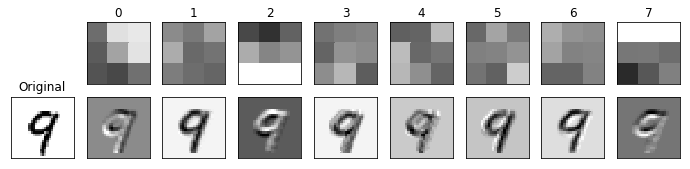

In [8]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)

plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # フィルター処理
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()


In [9]:
#-- リスト 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), 
          input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                # (B)
model.add(Dropout(0.25))                                   # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                  # (D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()

history = model.ﬁt(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


 1000/60000 [..............................] - ETA: 1:33 - loss: 2.3225 - acc: 0.0890

 2000/60000 [>.............................] - ETA: 1:11 - loss: 2.2726 - acc: 0.1615

 3000/60000 [>.............................] - ETA: 1:00 - loss: 2.2343 - acc: 0.2183

 4000/60000 [=>............................] - ETA: 55s - loss: 2.1923 - acc: 0.2620 

 5000/60000 [=>............................] - ETA: 51s - loss: 2.1482 - acc: 0.2988

 6000/60000 [==>...........................] - ETA: 48s - loss: 2.0929 - acc: 0.3362

 7000/60000 [==>...........................] - ETA: 46s - loss: 2.0295 - acc: 0.3747

 8000/60000 [===>..........................] - ETA: 44s - loss: 1.9603 - acc: 0.4051

 9000/60000 [===>..........................] - ETA: 42s - loss: 1.8869 - acc: 0.4326

10000/60000 [====>.........................] - ETA: 41s - loss: 1.8152 - acc: 0.4540

11000/60000 [====>.........................] - ETA: 39s - loss: 1.7487 - acc: 0.4726

12000/60000 [=====>........................] - ETA: 38s - loss: 1.6841 - acc: 0.4904

13000/60000 [=====>........................] - ETA: 37s - loss: 1.6187 - acc: 0.5074

14000/60000 [======>.......................] - ETA: 36s - loss: 1.5645 - acc: 0.5226

15000/60000 [======>.......................] - ETA: 35s - loss: 1.5119 - acc: 0.5362

16000/60000 [=======>......................] - ETA: 34s - loss: 1.4616 - acc: 0.5508

17000/60000 [=======>......................] - ETA: 33s - loss: 1.4108 - acc: 0.5655

18000/60000 [========>.....................] - ETA: 32s - loss: 1.3678 - acc: 0.5785

19000/60000 [========>.....................] - ETA: 31s - loss: 1.3236 - acc: 0.5919

20000/60000 [=========>....................] - ETA: 30s - loss: 1.2831 - acc: 0.6043

21000/60000 [=========>....................] - ETA: 30s - loss: 1.2442 - acc: 0.6151

22000/60000 [==========>...................] - ETA: 29s - loss: 1.2098 - acc: 0.6260

23000/60000 [==========>...................] - ETA: 28s - loss: 1.1778 - acc: 0.6355

24000/60000 [===========>..................] - ETA: 27s - loss: 1.1490 - acc: 0.6443

25000/60000 [===========>..................] - ETA: 26s - loss: 1.1204 - acc: 0.6532

26000/60000 [============>.................] - ETA: 26s - loss: 1.0926 - acc: 0.6621

27000/60000 [============>.................] - ETA: 25s - loss: 1.0664 - acc: 0.6701

28000/60000 [=============>................] - ETA: 24s - loss: 1.0414 - acc: 0.6776

29000/60000 [=============>................] - ETA: 23s - loss: 1.0179 - acc: 0.6849

30000/60000 [==============>...............] - ETA: 22s - loss: 0.9960 - acc: 0.6922

31000/60000 [==============>...............] - ETA: 22s - loss: 0.9732 - acc: 0.6993

32000/60000 [===============>..............] - ETA: 21s - loss: 0.9532 - acc: 0.7054

33000/60000 [===============>..............] - ETA: 20s - loss: 0.9346 - acc: 0.7111

34000/60000 [================>.............] - ETA: 19s - loss: 0.9161 - acc: 0.7171

35000/60000 [================>.............] - ETA: 18s - loss: 0.8984 - acc: 0.7229

36000/60000 [=================>............] - ETA: 18s - loss: 0.8807 - acc: 0.7285

37000/60000 [=================>............] - ETA: 17s - loss: 0.8668 - acc: 0.7330

38000/60000 [==================>...........] - ETA: 16s - loss: 0.8514 - acc: 0.7378

39000/60000 [==================>...........] - ETA: 15s - loss: 0.8361 - acc: 0.7423

40000/60000 [===================>..........] - ETA: 15s - loss: 0.8211 - acc: 0.7468

41000/60000 [===================>..........] - ETA: 14s - loss: 0.8065 - acc: 0.7513

42000/60000 [====================>.........] - ETA: 13s - loss: 0.7938 - acc: 0.7554

43000/60000 [====================>.........] - ETA: 12s - loss: 0.7811 - acc: 0.7594

44000/60000 [=====================>........] - ETA: 11s - loss: 0.7685 - acc: 0.7632

45000/60000 [=====================>........] - ETA: 11s - loss: 0.7563 - acc: 0.7670

46000/60000 [======================>.......] - ETA: 10s - loss: 0.7457 - acc: 0.7705

47000/60000 [======================>.......] - ETA: 9s - loss: 0.7349 - acc: 0.7740 

48000/60000 [=======================>......] - ETA: 8s - loss: 0.7233 - acc: 0.7776

49000/60000 [=======================>......] - ETA: 8s - loss: 0.7124 - acc: 0.7810

50000/60000 [========================>.....] - ETA: 7s - loss: 0.7019 - acc: 0.7842

51000/60000 [========================>.....] - ETA: 6s - loss: 0.6920 - acc: 0.7872

52000/60000 [=========================>....] - ETA: 5s - loss: 0.6828 - acc: 0.7902

53000/60000 [=========================>....] - ETA: 5s - loss: 0.6739 - acc: 0.7929

54000/60000 [==========================>...] - ETA: 4s - loss: 0.6649 - acc: 0.7958

55000/60000 [==========================>...] - ETA: 3s - loss: 0.6562 - acc: 0.7985

56000/60000 [===========================>..] - ETA: 2s - loss: 0.6477 - acc: 0.8011

57000/60000 [===========================>..] - ETA: 2s - loss: 0.6390 - acc: 0.8038

58000/60000 [============================>.] - ETA: 1s - loss: 0.6314 - acc: 0.8063

59000/60000 [============================>.] - ETA: 0s - loss: 0.6238 - acc: 0.8087

60000/60000 [==============================] - 47s 780us/step - loss: 0.6164 - acc: 0.8111 - val_loss: 0.1171 - val_acc: 0.9645


Epoch 2/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.1504 - acc: 0.9530

 2000/60000 [>.............................] - ETA: 39s - loss: 0.1782 - acc: 0.9460

 3000/60000 [>.............................] - ETA: 39s - loss: 0.1771 - acc: 0.9480

 4000/60000 [=>............................] - ETA: 39s - loss: 0.1669 - acc: 0.9520

 5000/60000 [=>............................] - ETA: 38s - loss: 0.1752 - acc: 0.9496

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.1712 - acc: 0.9497

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.1658 - acc: 0.9513

 8000/60000 [===>..........................] - ETA: 35s - loss: 0.1649 - acc: 0.9515

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.1638 - acc: 0.9516

10000/60000 [====>.........................] - ETA: 34s - loss: 0.1611 - acc: 0.9522

11000/60000 [====>.........................] - ETA: 33s - loss: 0.1617 - acc: 0.9518

12000/60000 [=====>........................] - ETA: 33s - loss: 0.1603 - acc: 0.9529

13000/60000 [=====>........................] - ETA: 32s - loss: 0.1596 - acc: 0.9531

14000/60000 [======>.......................] - ETA: 32s - loss: 0.1599 - acc: 0.9531

15000/60000 [======>.......................] - ETA: 31s - loss: 0.1577 - acc: 0.9542

16000/60000 [=======>......................] - ETA: 30s - loss: 0.1572 - acc: 0.9539

17000/60000 [=======>......................] - ETA: 29s - loss: 0.1552 - acc: 0.9543

18000/60000 [========>.....................] - ETA: 29s - loss: 0.1546 - acc: 0.9543

19000/60000 [========>.....................] - ETA: 28s - loss: 0.1546 - acc: 0.9548

20000/60000 [=========>....................] - ETA: 27s - loss: 0.1537 - acc: 0.9553

21000/60000 [=========>....................] - ETA: 27s - loss: 0.1539 - acc: 0.9548

22000/60000 [==========>...................] - ETA: 26s - loss: 0.1540 - acc: 0.9548

23000/60000 [==========>...................] - ETA: 25s - loss: 0.1521 - acc: 0.9553

24000/60000 [===========>..................] - ETA: 25s - loss: 0.1520 - acc: 0.9555

25000/60000 [===========>..................] - ETA: 24s - loss: 0.1522 - acc: 0.9552

26000/60000 [============>.................] - ETA: 23s - loss: 0.1524 - acc: 0.9553

27000/60000 [============>.................] - ETA: 22s - loss: 0.1510 - acc: 0.9556

28000/60000 [=============>................] - ETA: 22s - loss: 0.1511 - acc: 0.9557

29000/60000 [=============>................] - ETA: 21s - loss: 0.1500 - acc: 0.9561

30000/60000 [==============>...............] - ETA: 20s - loss: 0.1495 - acc: 0.9561

31000/60000 [==============>...............] - ETA: 20s - loss: 0.1482 - acc: 0.9566

32000/60000 [===============>..............] - ETA: 19s - loss: 0.1477 - acc: 0.9566

33000/60000 [===============>..............] - ETA: 18s - loss: 0.1471 - acc: 0.9566

34000/60000 [================>.............] - ETA: 18s - loss: 0.1468 - acc: 0.9567

35000/60000 [================>.............] - ETA: 17s - loss: 0.1461 - acc: 0.9568

36000/60000 [=================>............] - ETA: 16s - loss: 0.1459 - acc: 0.9569

37000/60000 [=================>............] - ETA: 15s - loss: 0.1448 - acc: 0.9573

38000/60000 [==================>...........] - ETA: 15s - loss: 0.1444 - acc: 0.9574

39000/60000 [==================>...........] - ETA: 14s - loss: 0.1435 - acc: 0.9576

40000/60000 [===================>..........] - ETA: 13s - loss: 0.1431 - acc: 0.9578

41000/60000 [===================>..........] - ETA: 13s - loss: 0.1422 - acc: 0.9581

42000/60000 [====================>.........] - ETA: 12s - loss: 0.1414 - acc: 0.9583

43000/60000 [====================>.........] - ETA: 11s - loss: 0.1408 - acc: 0.9585

44000/60000 [=====================>........] - ETA: 11s - loss: 0.1401 - acc: 0.9587

45000/60000 [=====================>........] - ETA: 10s - loss: 0.1394 - acc: 0.9588

46000/60000 [======================>.......] - ETA: 9s - loss: 0.1384 - acc: 0.9591 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.1380 - acc: 0.9592

48000/60000 [=======================>......] - ETA: 8s - loss: 0.1377 - acc: 0.9592

49000/60000 [=======================>......] - ETA: 7s - loss: 0.1366 - acc: 0.9596

50000/60000 [========================>.....] - ETA: 6s - loss: 0.1361 - acc: 0.9596

51000/60000 [========================>.....] - ETA: 6s - loss: 0.1351 - acc: 0.9599

52000/60000 [=========================>....] - ETA: 5s - loss: 0.1347 - acc: 0.9600

53000/60000 [=========================>....] - ETA: 4s - loss: 0.1348 - acc: 0.9600

54000/60000 [==========================>...] - ETA: 4s - loss: 0.1340 - acc: 0.9602

55000/60000 [==========================>...] - ETA: 3s - loss: 0.1334 - acc: 0.9603

56000/60000 [===========================>..] - ETA: 2s - loss: 0.1330 - acc: 0.9604

57000/60000 [===========================>..] - ETA: 2s - loss: 0.1320 - acc: 0.9606

58000/60000 [============================>.] - ETA: 1s - loss: 0.1312 - acc: 0.9609

59000/60000 [============================>.] - ETA: 0s - loss: 0.1303 - acc: 0.9612

60000/60000 [==============================] - 44s 738us/step - loss: 0.1302 - acc: 0.9612 - val_loss: 0.0618 - val_acc: 0.9800


Epoch 3/20


 1000/60000 [..............................] - ETA: 40s - loss: 0.0964 - acc: 0.9690

 2000/60000 [>.............................] - ETA: 40s - loss: 0.0992 - acc: 0.9700

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0946 - acc: 0.9720

 4000/60000 [=>............................] - ETA: 38s - loss: 0.0866 - acc: 0.9737

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0884 - acc: 0.9734

 6000/60000 [==>...........................] - ETA: 36s - loss: 0.0882 - acc: 0.9735

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0891 - acc: 0.9731

 8000/60000 [===>..........................] - ETA: 35s - loss: 0.0876 - acc: 0.9735

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0858 - acc: 0.9738

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0870 - acc: 0.9739

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0895 - acc: 0.9731

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0914 - acc: 0.9726

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0885 - acc: 0.9735

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0905 - acc: 0.9726

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0930 - acc: 0.9720

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0934 - acc: 0.9719

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0926 - acc: 0.9721

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0914 - acc: 0.9724

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0908 - acc: 0.9725

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0907 - acc: 0.9727

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0908 - acc: 0.9727

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0902 - acc: 0.9726

23000/60000 [==========>...................] - ETA: 25s - loss: 0.0917 - acc: 0.9724

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0920 - acc: 0.9724

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0918 - acc: 0.9725

26000/60000 [============>.................] - ETA: 23s - loss: 0.0915 - acc: 0.9727

27000/60000 [============>.................] - ETA: 23s - loss: 0.0912 - acc: 0.9726

28000/60000 [=============>................] - ETA: 22s - loss: 0.0909 - acc: 0.9726

29000/60000 [=============>................] - ETA: 21s - loss: 0.0913 - acc: 0.9725

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0910 - acc: 0.9725

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0913 - acc: 0.9724

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0908 - acc: 0.9725

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0911 - acc: 0.9722

34000/60000 [================>.............] - ETA: 18s - loss: 0.0902 - acc: 0.9727

35000/60000 [================>.............] - ETA: 17s - loss: 0.0901 - acc: 0.9727

36000/60000 [=================>............] - ETA: 16s - loss: 0.0897 - acc: 0.9728

37000/60000 [=================>............] - ETA: 16s - loss: 0.0892 - acc: 0.9731

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0887 - acc: 0.9732

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0888 - acc: 0.9732

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0887 - acc: 0.9732

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0885 - acc: 0.9734

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0881 - acc: 0.9735

43000/60000 [====================>.........] - ETA: 11s - loss: 0.0877 - acc: 0.9736

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0871 - acc: 0.9738

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0872 - acc: 0.9738

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0880 - acc: 0.9735 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0879 - acc: 0.9735

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0875 - acc: 0.9736

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0873 - acc: 0.9736

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0875 - acc: 0.9736

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0872 - acc: 0.9737

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0871 - acc: 0.9736

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0872 - acc: 0.9736

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0869 - acc: 0.9737

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0873 - acc: 0.9736

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0869 - acc: 0.9737

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0867 - acc: 0.9738

58000/60000 [============================>.] - ETA: 1s - loss: 0.0865 - acc: 0.9738

59000/60000 [============================>.] - ETA: 0s - loss: 0.0864 - acc: 0.9738

60000/60000 [==============================] - 44s 741us/step - loss: 0.0863 - acc: 0.9738 - val_loss: 0.0474 - val_acc: 0.9857


Epoch 4/20


 1000/60000 [..............................] - ETA: 40s - loss: 0.0698 - acc: 0.9760

 2000/60000 [>.............................] - ETA: 39s - loss: 0.0615 - acc: 0.9800

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0715 - acc: 0.9777

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0699 - acc: 0.9783

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0661 - acc: 0.9798

 6000/60000 [==>...........................] - ETA: 38s - loss: 0.0645 - acc: 0.9803

 7000/60000 [==>...........................] - ETA: 37s - loss: 0.0666 - acc: 0.9791

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0684 - acc: 0.9786

 9000/60000 [===>..........................] - ETA: 36s - loss: 0.0704 - acc: 0.9782

10000/60000 [====>.........................] - ETA: 35s - loss: 0.0681 - acc: 0.9791

11000/60000 [====>.........................] - ETA: 35s - loss: 0.0681 - acc: 0.9790

12000/60000 [=====>........................] - ETA: 34s - loss: 0.0685 - acc: 0.9790

13000/60000 [=====>........................] - ETA: 33s - loss: 0.0702 - acc: 0.9786

14000/60000 [======>.......................] - ETA: 33s - loss: 0.0706 - acc: 0.9786

15000/60000 [======>.......................] - ETA: 32s - loss: 0.0703 - acc: 0.9787

16000/60000 [=======>......................] - ETA: 31s - loss: 0.0709 - acc: 0.9784

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0701 - acc: 0.9785

18000/60000 [========>.....................] - ETA: 30s - loss: 0.0698 - acc: 0.9786

19000/60000 [========>.....................] - ETA: 29s - loss: 0.0700 - acc: 0.9785

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0698 - acc: 0.9784

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0694 - acc: 0.9782

22000/60000 [==========>...................] - ETA: 27s - loss: 0.0695 - acc: 0.9784

23000/60000 [==========>...................] - ETA: 26s - loss: 0.0683 - acc: 0.9790

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0679 - acc: 0.9790

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0682 - acc: 0.9788

26000/60000 [============>.................] - ETA: 24s - loss: 0.0688 - acc: 0.9786

27000/60000 [============>.................] - ETA: 23s - loss: 0.0690 - acc: 0.9786

28000/60000 [=============>................] - ETA: 22s - loss: 0.0688 - acc: 0.9784

29000/60000 [=============>................] - ETA: 22s - loss: 0.0686 - acc: 0.9783

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0688 - acc: 0.9782

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0686 - acc: 0.9783

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0683 - acc: 0.9784

33000/60000 [===============>..............] - ETA: 19s - loss: 0.0688 - acc: 0.9784

34000/60000 [================>.............] - ETA: 18s - loss: 0.0689 - acc: 0.9785

35000/60000 [================>.............] - ETA: 17s - loss: 0.0686 - acc: 0.9786

36000/60000 [=================>............] - ETA: 17s - loss: 0.0688 - acc: 0.9787

37000/60000 [=================>............] - ETA: 16s - loss: 0.0688 - acc: 0.9786

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0686 - acc: 0.9786

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0686 - acc: 0.9786

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0689 - acc: 0.9784

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0689 - acc: 0.9784

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0686 - acc: 0.9786

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0682 - acc: 0.9787

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0679 - acc: 0.9788

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0679 - acc: 0.9788

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0678 - acc: 0.9787 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0676 - acc: 0.9788

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0676 - acc: 0.9788

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0677 - acc: 0.9786

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0677 - acc: 0.9787

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0676 - acc: 0.9788

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0675 - acc: 0.9788

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0679 - acc: 0.9788

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0678 - acc: 0.9787

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0680 - acc: 0.9787

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0678 - acc: 0.9788

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0680 - acc: 0.9786

58000/60000 [============================>.] - ETA: 1s - loss: 0.0684 - acc: 0.9784

59000/60000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9785

60000/60000 [==============================] - 45s 755us/step - loss: 0.0680 - acc: 0.9786 - val_loss: 0.0376 - val_acc: 0.9885


Epoch 5/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.0790 - acc: 0.9760

 2000/60000 [>.............................] - ETA: 40s - loss: 0.0748 - acc: 0.9765

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0687 - acc: 0.9790

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0656 - acc: 0.9795

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0670 - acc: 0.9792

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0675 - acc: 0.9793

 7000/60000 [==>...........................] - ETA: 37s - loss: 0.0658 - acc: 0.9801

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0650 - acc: 0.9805

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0646 - acc: 0.9808

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0629 - acc: 0.9811

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0635 - acc: 0.9808

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0639 - acc: 0.9808

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0645 - acc: 0.9808

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0644 - acc: 0.9811

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0643 - acc: 0.9813

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0643 - acc: 0.9812

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0640 - acc: 0.9811

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0632 - acc: 0.9813

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0617 - acc: 0.9816

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0618 - acc: 0.9815

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0620 - acc: 0.9813

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0616 - acc: 0.9812

23000/60000 [==========>...................] - ETA: 25s - loss: 0.0606 - acc: 0.9816

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0600 - acc: 0.9817

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0604 - acc: 0.9815

26000/60000 [============>.................] - ETA: 23s - loss: 0.0601 - acc: 0.9816

27000/60000 [============>.................] - ETA: 23s - loss: 0.0593 - acc: 0.9819

28000/60000 [=============>................] - ETA: 22s - loss: 0.0595 - acc: 0.9820

29000/60000 [=============>................] - ETA: 21s - loss: 0.0593 - acc: 0.9821

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0589 - acc: 0.9822

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0595 - acc: 0.9821

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0598 - acc: 0.9819

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0596 - acc: 0.9820

34000/60000 [================>.............] - ETA: 18s - loss: 0.0596 - acc: 0.9819

35000/60000 [================>.............] - ETA: 17s - loss: 0.0596 - acc: 0.9820

36000/60000 [=================>............] - ETA: 16s - loss: 0.0596 - acc: 0.9821

37000/60000 [=================>............] - ETA: 16s - loss: 0.0596 - acc: 0.9821

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0593 - acc: 0.9821

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0592 - acc: 0.9821

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0585 - acc: 0.9822

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0586 - acc: 0.9822

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0587 - acc: 0.9822

43000/60000 [====================>.........] - ETA: 11s - loss: 0.0589 - acc: 0.9820

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0586 - acc: 0.9821

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0586 - acc: 0.9821

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0579 - acc: 0.9824 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0580 - acc: 0.9823

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0579 - acc: 0.9824

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0576 - acc: 0.9824

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0573 - acc: 0.9826

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0571 - acc: 0.9826

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0568 - acc: 0.9827

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0566 - acc: 0.9828

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0570 - acc: 0.9827

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0570 - acc: 0.9827

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0567 - acc: 0.9827

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0564 - acc: 0.9828

58000/60000 [============================>.] - ETA: 1s - loss: 0.0564 - acc: 0.9828

59000/60000 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9828

60000/60000 [==============================] - 45s 744us/step - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0318 - val_acc: 0.9888


Epoch 6/20


 1000/60000 [..............................] - ETA: 40s - loss: 0.0430 - acc: 0.9870

 2000/60000 [>.............................] - ETA: 40s - loss: 0.0474 - acc: 0.9860

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0460 - acc: 0.9857

 4000/60000 [=>............................] - ETA: 38s - loss: 0.0480 - acc: 0.9843

 5000/60000 [=>............................] - ETA: 37s - loss: 0.0459 - acc: 0.9852

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0464 - acc: 0.9850

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0466 - acc: 0.9849

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0484 - acc: 0.9848

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0490 - acc: 0.9847

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0498 - acc: 0.9844

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0489 - acc: 0.9846

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0498 - acc: 0.9840

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0499 - acc: 0.9840

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0490 - acc: 0.9844

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0483 - acc: 0.9844

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0482 - acc: 0.9846

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0495 - acc: 0.9845

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0489 - acc: 0.9848

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0488 - acc: 0.9847

20000/60000 [=========>....................] - ETA: 27s - loss: 0.0493 - acc: 0.9843

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0495 - acc: 0.9841

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0490 - acc: 0.9843

23000/60000 [==========>...................] - ETA: 25s - loss: 0.0484 - acc: 0.9844

24000/60000 [===========>..................] - ETA: 24s - loss: 0.0481 - acc: 0.9845

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0479 - acc: 0.9848

26000/60000 [============>.................] - ETA: 23s - loss: 0.0479 - acc: 0.9847

27000/60000 [============>.................] - ETA: 22s - loss: 0.0476 - acc: 0.9847

28000/60000 [=============>................] - ETA: 22s - loss: 0.0478 - acc: 0.9847

29000/60000 [=============>................] - ETA: 21s - loss: 0.0481 - acc: 0.9846

30000/60000 [==============>...............] - ETA: 20s - loss: 0.0479 - acc: 0.9846

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0479 - acc: 0.9847

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0475 - acc: 0.9849

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0473 - acc: 0.9850

34000/60000 [================>.............] - ETA: 18s - loss: 0.0475 - acc: 0.9849

35000/60000 [================>.............] - ETA: 17s - loss: 0.0472 - acc: 0.9849

36000/60000 [=================>............] - ETA: 16s - loss: 0.0478 - acc: 0.9847

37000/60000 [=================>............] - ETA: 15s - loss: 0.0474 - acc: 0.9848

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0471 - acc: 0.9848

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0478 - acc: 0.9846

40000/60000 [===================>..........] - ETA: 13s - loss: 0.0485 - acc: 0.9844

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0487 - acc: 0.9842

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0488 - acc: 0.9843

43000/60000 [====================>.........] - ETA: 11s - loss: 0.0490 - acc: 0.9843

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0490 - acc: 0.9843

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0486 - acc: 0.9844

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0490 - acc: 0.9844 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0492 - acc: 0.9844

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0493 - acc: 0.9843

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0493 - acc: 0.9843

50000/60000 [========================>.....] - ETA: 6s - loss: 0.0492 - acc: 0.9843

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0490 - acc: 0.9843

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0491 - acc: 0.9843

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0493 - acc: 0.9842

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0494 - acc: 0.9842

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0492 - acc: 0.9843

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0497 - acc: 0.9842

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0499 - acc: 0.9841

58000/60000 [============================>.] - ETA: 1s - loss: 0.0497 - acc: 0.9841

59000/60000 [============================>.] - ETA: 0s - loss: 0.0501 - acc: 0.9840

60000/60000 [==============================] - 44s 729us/step - loss: 0.0501 - acc: 0.9840 - val_loss: 0.0292 - val_acc: 0.9909


Epoch 7/20


 1000/60000 [..............................] - ETA: 41s - loss: 0.0429 - acc: 0.9880

 2000/60000 [>.............................] - ETA: 40s - loss: 0.0536 - acc: 0.9815

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0499 - acc: 0.9823

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0464 - acc: 0.9840

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0469 - acc: 0.9844

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0432 - acc: 0.9858

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0415 - acc: 0.9859

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0427 - acc: 0.9856

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0438 - acc: 0.9849

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0424 - acc: 0.9853

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0420 - acc: 0.9853

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0449 - acc: 0.9849

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0437 - acc: 0.9852

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0433 - acc: 0.9854

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0432 - acc: 0.9856

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0443 - acc: 0.9854

17000/60000 [=======>......................] - ETA: 29s - loss: 0.0442 - acc: 0.9854

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0440 - acc: 0.9856

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0445 - acc: 0.9856

20000/60000 [=========>....................] - ETA: 27s - loss: 0.0443 - acc: 0.9856

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0446 - acc: 0.9855

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0443 - acc: 0.9857

23000/60000 [==========>...................] - ETA: 25s - loss: 0.0445 - acc: 0.9855

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0449 - acc: 0.9855

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0447 - acc: 0.9855

26000/60000 [============>.................] - ETA: 23s - loss: 0.0450 - acc: 0.9855

27000/60000 [============>.................] - ETA: 22s - loss: 0.0452 - acc: 0.9853

28000/60000 [=============>................] - ETA: 22s - loss: 0.0455 - acc: 0.9853

29000/60000 [=============>................] - ETA: 21s - loss: 0.0452 - acc: 0.9854

30000/60000 [==============>...............] - ETA: 20s - loss: 0.0451 - acc: 0.9855

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0447 - acc: 0.9856

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0447 - acc: 0.9856

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0454 - acc: 0.9854

34000/60000 [================>.............] - ETA: 18s - loss: 0.0455 - acc: 0.9854

35000/60000 [================>.............] - ETA: 17s - loss: 0.0455 - acc: 0.9853

36000/60000 [=================>............] - ETA: 16s - loss: 0.0451 - acc: 0.9855

37000/60000 [=================>............] - ETA: 15s - loss: 0.0451 - acc: 0.9856

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0449 - acc: 0.9856

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0455 - acc: 0.9854

40000/60000 [===================>..........] - ETA: 13s - loss: 0.0455 - acc: 0.9855

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0453 - acc: 0.9857

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0454 - acc: 0.9857

43000/60000 [====================>.........] - ETA: 11s - loss: 0.0456 - acc: 0.9857

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0456 - acc: 0.9857

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0455 - acc: 0.9857

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0457 - acc: 0.9857 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0455 - acc: 0.9857

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0452 - acc: 0.9859

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0451 - acc: 0.9859

50000/60000 [========================>.....] - ETA: 6s - loss: 0.0454 - acc: 0.9858

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0456 - acc: 0.9857

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0452 - acc: 0.9858

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0458 - acc: 0.9857

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0459 - acc: 0.9856

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0459 - acc: 0.9856

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0458 - acc: 0.9856

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0458 - acc: 0.9855

58000/60000 [============================>.] - ETA: 1s - loss: 0.0458 - acc: 0.9855

59000/60000 [============================>.] - ETA: 0s - loss: 0.0457 - acc: 0.9855

60000/60000 [==============================] - 44s 732us/step - loss: 0.0457 - acc: 0.9855 - val_loss: 0.0287 - val_acc: 0.9902


Epoch 8/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.0446 - acc: 0.9850

 2000/60000 [>.............................] - ETA: 39s - loss: 0.0461 - acc: 0.9870

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0438 - acc: 0.9883

 4000/60000 [=>............................] - ETA: 38s - loss: 0.0383 - acc: 0.9898

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0370 - acc: 0.9898

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0393 - acc: 0.9895

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0412 - acc: 0.9890

 8000/60000 [===>..........................] - ETA: 35s - loss: 0.0422 - acc: 0.9883

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0430 - acc: 0.9881

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0423 - acc: 0.9881

11000/60000 [====>.........................] - ETA: 33s - loss: 0.0421 - acc: 0.9883

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0414 - acc: 0.9884

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0426 - acc: 0.9878

14000/60000 [======>.......................] - ETA: 31s - loss: 0.0423 - acc: 0.9877

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0427 - acc: 0.9875

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0435 - acc: 0.9873

17000/60000 [=======>......................] - ETA: 29s - loss: 0.0429 - acc: 0.9872

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0426 - acc: 0.9871

19000/60000 [========>.....................] - ETA: 29s - loss: 0.0427 - acc: 0.9871

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0441 - acc: 0.9866

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0439 - acc: 0.9866

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0440 - acc: 0.9865

23000/60000 [==========>...................] - ETA: 26s - loss: 0.0436 - acc: 0.9867

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0430 - acc: 0.9869

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0427 - acc: 0.9871

26000/60000 [============>.................] - ETA: 24s - loss: 0.0430 - acc: 0.9870

27000/60000 [============>.................] - ETA: 23s - loss: 0.0431 - acc: 0.9871

28000/60000 [=============>................] - ETA: 22s - loss: 0.0430 - acc: 0.9870

29000/60000 [=============>................] - ETA: 21s - loss: 0.0423 - acc: 0.9872

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0433 - acc: 0.9871

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0428 - acc: 0.9872

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0428 - acc: 0.9871

33000/60000 [===============>..............] - ETA: 19s - loss: 0.0425 - acc: 0.9872

34000/60000 [================>.............] - ETA: 18s - loss: 0.0425 - acc: 0.9872

35000/60000 [================>.............] - ETA: 17s - loss: 0.0419 - acc: 0.9873

36000/60000 [=================>............] - ETA: 17s - loss: 0.0418 - acc: 0.9873

37000/60000 [=================>............] - ETA: 16s - loss: 0.0420 - acc: 0.9871

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0417 - acc: 0.9873

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0416 - acc: 0.9873

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0412 - acc: 0.9875

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0415 - acc: 0.9875

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0413 - acc: 0.9875

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0408 - acc: 0.9877

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0405 - acc: 0.9878

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0401 - acc: 0.9878

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0401 - acc: 0.9878 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0402 - acc: 0.9877

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0398 - acc: 0.9879

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0398 - acc: 0.9878

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0399 - acc: 0.9878

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0397 - acc: 0.9879

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0395 - acc: 0.9879

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0395 - acc: 0.9879

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0395 - acc: 0.9878

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0399 - acc: 0.9877

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0398 - acc: 0.9877

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0397 - acc: 0.9878

58000/60000 [============================>.] - ETA: 1s - loss: 0.0399 - acc: 0.9877

59000/60000 [============================>.] - ETA: 0s - loss: 0.0398 - acc: 0.9878

60000/60000 [==============================] - 46s 761us/step - loss: 0.0397 - acc: 0.9878 - val_loss: 0.0250 - val_acc: 0.9911


Epoch 9/20


 1000/60000 [..............................] - ETA: 42s - loss: 0.0232 - acc: 0.9930

 2000/60000 [>.............................] - ETA: 41s - loss: 0.0243 - acc: 0.9925

 3000/60000 [>.............................] - ETA: 40s - loss: 0.0318 - acc: 0.9910

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0347 - acc: 0.9905

 5000/60000 [=>............................] - ETA: 39s - loss: 0.0340 - acc: 0.9904

 6000/60000 [==>...........................] - ETA: 39s - loss: 0.0337 - acc: 0.9902

 7000/60000 [==>...........................] - ETA: 38s - loss: 0.0340 - acc: 0.9900

 8000/60000 [===>..........................] - ETA: 37s - loss: 0.0344 - acc: 0.9896

 9000/60000 [===>..........................] - ETA: 36s - loss: 0.0336 - acc: 0.9897

10000/60000 [====>.........................] - ETA: 35s - loss: 0.0337 - acc: 0.9898

11000/60000 [====>.........................] - ETA: 35s - loss: 0.0348 - acc: 0.9899

12000/60000 [=====>........................] - ETA: 34s - loss: 0.0347 - acc: 0.9898

13000/60000 [=====>........................] - ETA: 34s - loss: 0.0350 - acc: 0.9895

14000/60000 [======>.......................] - ETA: 33s - loss: 0.0348 - acc: 0.9893

15000/60000 [======>.......................] - ETA: 32s - loss: 0.0347 - acc: 0.9892

16000/60000 [=======>......................] - ETA: 32s - loss: 0.0336 - acc: 0.9896

17000/60000 [=======>......................] - ETA: 31s - loss: 0.0335 - acc: 0.9897

18000/60000 [========>.....................] - ETA: 30s - loss: 0.0348 - acc: 0.9896

19000/60000 [========>.....................] - ETA: 30s - loss: 0.0348 - acc: 0.9897

20000/60000 [=========>....................] - ETA: 29s - loss: 0.0347 - acc: 0.9898

21000/60000 [=========>....................] - ETA: 28s - loss: 0.0344 - acc: 0.9899

22000/60000 [==========>...................] - ETA: 27s - loss: 0.0343 - acc: 0.9898

23000/60000 [==========>...................] - ETA: 26s - loss: 0.0347 - acc: 0.9897

24000/60000 [===========>..................] - ETA: 26s - loss: 0.0340 - acc: 0.9900

25000/60000 [===========>..................] - ETA: 25s - loss: 0.0337 - acc: 0.9900

26000/60000 [============>.................] - ETA: 24s - loss: 0.0335 - acc: 0.9901

27000/60000 [============>.................] - ETA: 23s - loss: 0.0333 - acc: 0.9901

28000/60000 [=============>................] - ETA: 23s - loss: 0.0334 - acc: 0.9901

29000/60000 [=============>................] - ETA: 22s - loss: 0.0330 - acc: 0.9902

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0325 - acc: 0.9904

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0326 - acc: 0.9903

32000/60000 [===============>..............] - ETA: 20s - loss: 0.0327 - acc: 0.9902

33000/60000 [===============>..............] - ETA: 19s - loss: 0.0333 - acc: 0.9901

34000/60000 [================>.............] - ETA: 18s - loss: 0.0337 - acc: 0.9901

35000/60000 [================>.............] - ETA: 18s - loss: 0.0336 - acc: 0.9901

36000/60000 [=================>............] - ETA: 17s - loss: 0.0336 - acc: 0.9901

37000/60000 [=================>............] - ETA: 16s - loss: 0.0339 - acc: 0.9900

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0345 - acc: 0.9898

39000/60000 [==================>...........] - ETA: 15s - loss: 0.0343 - acc: 0.9898

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0342 - acc: 0.9898

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0345 - acc: 0.9896

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0343 - acc: 0.9897

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0343 - acc: 0.9897

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0343 - acc: 0.9897

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0341 - acc: 0.9898

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0342 - acc: 0.9897

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0340 - acc: 0.9897 

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0339 - acc: 0.9897

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0338 - acc: 0.9898

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0338 - acc: 0.9897

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0337 - acc: 0.9898

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0342 - acc: 0.9896

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0341 - acc: 0.9896

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0342 - acc: 0.9895

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0343 - acc: 0.9895

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0344 - acc: 0.9895

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0341 - acc: 0.9895

58000/60000 [============================>.] - ETA: 1s - loss: 0.0343 - acc: 0.9895

59000/60000 [============================>.] - ETA: 0s - loss: 0.0342 - acc: 0.9895

60000/60000 [==============================] - 46s 771us/step - loss: 0.0342 - acc: 0.9895 - val_loss: 0.0259 - val_acc: 0.9909


Epoch 10/20


 1000/60000 [..............................] - ETA: 54s - loss: 0.0240 - acc: 0.9960

 2000/60000 [>.............................] - ETA: 55s - loss: 0.0273 - acc: 0.9925

 3000/60000 [>.............................] - ETA: 55s - loss: 0.0302 - acc: 0.9913

 4000/60000 [=>............................] - ETA: 54s - loss: 0.0277 - acc: 0.9920

 5000/60000 [=>............................] - ETA: 51s - loss: 0.0290 - acc: 0.9912

 6000/60000 [==>...........................] - ETA: 51s - loss: 0.0339 - acc: 0.9900

 7000/60000 [==>...........................] - ETA: 50s - loss: 0.0339 - acc: 0.9899

 8000/60000 [===>..........................] - ETA: 48s - loss: 0.0342 - acc: 0.9899

 9000/60000 [===>..........................] - ETA: 47s - loss: 0.0336 - acc: 0.9899

10000/60000 [====>.........................] - ETA: 47s - loss: 0.0331 - acc: 0.9901

11000/60000 [====>.........................] - ETA: 46s - loss: 0.0325 - acc: 0.9905

12000/60000 [=====>........................] - ETA: 45s - loss: 0.0333 - acc: 0.9900

13000/60000 [=====>........................] - ETA: 43s - loss: 0.0329 - acc: 0.9904

14000/60000 [======>.......................] - ETA: 42s - loss: 0.0336 - acc: 0.9904

15000/60000 [======>.......................] - ETA: 40s - loss: 0.0335 - acc: 0.9904

16000/60000 [=======>......................] - ETA: 39s - loss: 0.0338 - acc: 0.9904

17000/60000 [=======>......................] - ETA: 38s - loss: 0.0338 - acc: 0.9904

18000/60000 [========>.....................] - ETA: 37s - loss: 0.0334 - acc: 0.9907

19000/60000 [========>.....................] - ETA: 36s - loss: 0.0325 - acc: 0.9910

20000/60000 [=========>....................] - ETA: 35s - loss: 0.0328 - acc: 0.9906

21000/60000 [=========>....................] - ETA: 34s - loss: 0.0327 - acc: 0.9905

22000/60000 [==========>...................] - ETA: 33s - loss: 0.0327 - acc: 0.9904

23000/60000 [==========>...................] - ETA: 32s - loss: 0.0327 - acc: 0.9902

24000/60000 [===========>..................] - ETA: 31s - loss: 0.0327 - acc: 0.9900

25000/60000 [===========>..................] - ETA: 30s - loss: 0.0333 - acc: 0.9899

26000/60000 [============>.................] - ETA: 29s - loss: 0.0336 - acc: 0.9898

27000/60000 [============>.................] - ETA: 28s - loss: 0.0335 - acc: 0.9898

28000/60000 [=============>................] - ETA: 27s - loss: 0.0334 - acc: 0.9898

29000/60000 [=============>................] - ETA: 26s - loss: 0.0338 - acc: 0.9896

30000/60000 [==============>...............] - ETA: 25s - loss: 0.0334 - acc: 0.9897

31000/60000 [==============>...............] - ETA: 24s - loss: 0.0334 - acc: 0.9897

32000/60000 [===============>..............] - ETA: 24s - loss: 0.0334 - acc: 0.9898

33000/60000 [===============>..............] - ETA: 23s - loss: 0.0334 - acc: 0.9897

34000/60000 [================>.............] - ETA: 22s - loss: 0.0334 - acc: 0.9898

35000/60000 [================>.............] - ETA: 21s - loss: 0.0333 - acc: 0.9898

36000/60000 [=================>............] - ETA: 20s - loss: 0.0334 - acc: 0.9898

37000/60000 [=================>............] - ETA: 19s - loss: 0.0333 - acc: 0.9897

38000/60000 [==================>...........] - ETA: 18s - loss: 0.0337 - acc: 0.9896

39000/60000 [==================>...........] - ETA: 17s - loss: 0.0339 - acc: 0.9894

40000/60000 [===================>..........] - ETA: 16s - loss: 0.0339 - acc: 0.9894

41000/60000 [===================>..........] - ETA: 15s - loss: 0.0338 - acc: 0.9894

42000/60000 [====================>.........] - ETA: 15s - loss: 0.0338 - acc: 0.9894

43000/60000 [====================>.........] - ETA: 14s - loss: 0.0342 - acc: 0.9892

44000/60000 [=====================>........] - ETA: 13s - loss: 0.0346 - acc: 0.9892

45000/60000 [=====================>........] - ETA: 12s - loss: 0.0344 - acc: 0.9892

46000/60000 [======================>.......] - ETA: 11s - loss: 0.0344 - acc: 0.9892

47000/60000 [======================>.......] - ETA: 10s - loss: 0.0344 - acc: 0.9892

48000/60000 [=======================>......] - ETA: 9s - loss: 0.0345 - acc: 0.9892 

49000/60000 [=======================>......] - ETA: 9s - loss: 0.0348 - acc: 0.9891

50000/60000 [========================>.....] - ETA: 8s - loss: 0.0346 - acc: 0.9892

51000/60000 [========================>.....] - ETA: 7s - loss: 0.0345 - acc: 0.9892

52000/60000 [=========================>....] - ETA: 6s - loss: 0.0343 - acc: 0.9892

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0343 - acc: 0.9892

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0341 - acc: 0.9892

55000/60000 [==========================>...] - ETA: 4s - loss: 0.0344 - acc: 0.9893

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0342 - acc: 0.9893

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0343 - acc: 0.9894

58000/60000 [============================>.] - ETA: 1s - loss: 0.0344 - acc: 0.9893

59000/60000 [============================>.] - ETA: 0s - loss: 0.0343 - acc: 0.9894

60000/60000 [==============================] - 51s 852us/step - loss: 0.0343 - acc: 0.9893 - val_loss: 0.0259 - val_acc: 0.9911


Epoch 11/20


 1000/60000 [..............................] - ETA: 41s - loss: 0.0264 - acc: 0.9930

 2000/60000 [>.............................] - ETA: 41s - loss: 0.0290 - acc: 0.9920

 3000/60000 [>.............................] - ETA: 40s - loss: 0.0265 - acc: 0.9923

 4000/60000 [=>............................] - ETA: 38s - loss: 0.0276 - acc: 0.9917

 5000/60000 [=>............................] - ETA: 37s - loss: 0.0301 - acc: 0.9908

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0302 - acc: 0.9908

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0305 - acc: 0.9901

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0314 - acc: 0.9899

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0302 - acc: 0.9904

10000/60000 [====>.........................] - ETA: 35s - loss: 0.0317 - acc: 0.9900

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0304 - acc: 0.9905

12000/60000 [=====>........................] - ETA: 34s - loss: 0.0305 - acc: 0.9901

13000/60000 [=====>........................] - ETA: 33s - loss: 0.0309 - acc: 0.9898

14000/60000 [======>.......................] - ETA: 33s - loss: 0.0309 - acc: 0.9898

15000/60000 [======>.......................] - ETA: 32s - loss: 0.0302 - acc: 0.9901

16000/60000 [=======>......................] - ETA: 31s - loss: 0.0302 - acc: 0.9901

17000/60000 [=======>......................] - ETA: 31s - loss: 0.0308 - acc: 0.9899

18000/60000 [========>.....................] - ETA: 30s - loss: 0.0307 - acc: 0.9899

19000/60000 [========>.....................] - ETA: 29s - loss: 0.0307 - acc: 0.9898

20000/60000 [=========>....................] - ETA: 29s - loss: 0.0302 - acc: 0.9900

21000/60000 [=========>....................] - ETA: 28s - loss: 0.0300 - acc: 0.9901

22000/60000 [==========>...................] - ETA: 27s - loss: 0.0308 - acc: 0.9899

23000/60000 [==========>...................] - ETA: 27s - loss: 0.0304 - acc: 0.9901

24000/60000 [===========>..................] - ETA: 26s - loss: 0.0303 - acc: 0.9900

25000/60000 [===========>..................] - ETA: 25s - loss: 0.0302 - acc: 0.9901

26000/60000 [============>.................] - ETA: 24s - loss: 0.0296 - acc: 0.9903

27000/60000 [============>.................] - ETA: 24s - loss: 0.0297 - acc: 0.9903

28000/60000 [=============>................] - ETA: 23s - loss: 0.0298 - acc: 0.9902

29000/60000 [=============>................] - ETA: 22s - loss: 0.0300 - acc: 0.9904

30000/60000 [==============>...............] - ETA: 22s - loss: 0.0300 - acc: 0.9903

31000/60000 [==============>...............] - ETA: 21s - loss: 0.0303 - acc: 0.9903

32000/60000 [===============>..............] - ETA: 20s - loss: 0.0304 - acc: 0.9903

33000/60000 [===============>..............] - ETA: 19s - loss: 0.0305 - acc: 0.9902

34000/60000 [================>.............] - ETA: 19s - loss: 0.0301 - acc: 0.9904

35000/60000 [================>.............] - ETA: 18s - loss: 0.0300 - acc: 0.9904

36000/60000 [=================>............] - ETA: 17s - loss: 0.0300 - acc: 0.9903

37000/60000 [=================>............] - ETA: 17s - loss: 0.0299 - acc: 0.9903

38000/60000 [==================>...........] - ETA: 16s - loss: 0.0297 - acc: 0.9904

39000/60000 [==================>...........] - ETA: 15s - loss: 0.0295 - acc: 0.9904

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0297 - acc: 0.9903

41000/60000 [===================>..........] - ETA: 14s - loss: 0.0296 - acc: 0.9904

42000/60000 [====================>.........] - ETA: 13s - loss: 0.0295 - acc: 0.9903

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0299 - acc: 0.9903

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0298 - acc: 0.9902

45000/60000 [=====================>........] - ETA: 11s - loss: 0.0301 - acc: 0.9902

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0300 - acc: 0.9902

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0299 - acc: 0.9902 

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0296 - acc: 0.9903

49000/60000 [=======================>......] - ETA: 8s - loss: 0.0297 - acc: 0.9903

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0296 - acc: 0.9904

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0299 - acc: 0.9904

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0299 - acc: 0.9904

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0299 - acc: 0.9903

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0300 - acc: 0.9904

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0307 - acc: 0.9902

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0307 - acc: 0.9902

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0306 - acc: 0.9902

58000/60000 [============================>.] - ETA: 1s - loss: 0.0303 - acc: 0.9903

59000/60000 [============================>.] - ETA: 0s - loss: 0.0304 - acc: 0.9902

60000/60000 [==============================] - 47s 788us/step - loss: 0.0305 - acc: 0.9902 - val_loss: 0.0239 - val_acc: 0.9920


Epoch 12/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.0295 - acc: 0.9940

 2000/60000 [>.............................] - ETA: 40s - loss: 0.0291 - acc: 0.9905

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0280 - acc: 0.9917

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0287 - acc: 0.9915

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0295 - acc: 0.9912

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0284 - acc: 0.9913

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0279 - acc: 0.9914

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0271 - acc: 0.9918

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0273 - acc: 0.9914

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0300 - acc: 0.9907

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0298 - acc: 0.9908

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0298 - acc: 0.9904

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0293 - acc: 0.9905

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0293 - acc: 0.9906

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0292 - acc: 0.9903

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0285 - acc: 0.9906

17000/60000 [=======>......................] - ETA: 29s - loss: 0.0292 - acc: 0.9903

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0295 - acc: 0.9901

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0298 - acc: 0.9899

20000/60000 [=========>....................] - ETA: 27s - loss: 0.0306 - acc: 0.9895

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0306 - acc: 0.9895

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0313 - acc: 0.9895

23000/60000 [==========>...................] - ETA: 25s - loss: 0.0309 - acc: 0.9896

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0308 - acc: 0.9896

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0306 - acc: 0.9896

26000/60000 [============>.................] - ETA: 23s - loss: 0.0308 - acc: 0.9895

27000/60000 [============>.................] - ETA: 23s - loss: 0.0307 - acc: 0.9897

28000/60000 [=============>................] - ETA: 22s - loss: 0.0307 - acc: 0.9897

29000/60000 [=============>................] - ETA: 21s - loss: 0.0306 - acc: 0.9899

30000/60000 [==============>...............] - ETA: 20s - loss: 0.0302 - acc: 0.9901

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0300 - acc: 0.9902

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0301 - acc: 0.9902

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0298 - acc: 0.9903

34000/60000 [================>.............] - ETA: 18s - loss: 0.0296 - acc: 0.9905

35000/60000 [================>.............] - ETA: 17s - loss: 0.0292 - acc: 0.9907

36000/60000 [=================>............] - ETA: 16s - loss: 0.0294 - acc: 0.9907

37000/60000 [=================>............] - ETA: 16s - loss: 0.0292 - acc: 0.9907

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0293 - acc: 0.9907

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0292 - acc: 0.9908

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0289 - acc: 0.9908

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0287 - acc: 0.9909

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0285 - acc: 0.9910

43000/60000 [====================>.........] - ETA: 11s - loss: 0.0284 - acc: 0.9910

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0285 - acc: 0.9909

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0286 - acc: 0.9908

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0285 - acc: 0.9908 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0284 - acc: 0.9909

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0284 - acc: 0.9909

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0282 - acc: 0.9910

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0281 - acc: 0.9910

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0279 - acc: 0.9910

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0281 - acc: 0.9910

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0280 - acc: 0.9910

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0279 - acc: 0.9910

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0278 - acc: 0.9911

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0276 - acc: 0.9911

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0276 - acc: 0.9911

58000/60000 [============================>.] - ETA: 1s - loss: 0.0279 - acc: 0.9910

59000/60000 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.9911

60000/60000 [==============================] - 45s 743us/step - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0249 - val_acc: 0.9917


Epoch 13/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.0163 - acc: 0.9940

 2000/60000 [>.............................] - ETA: 39s - loss: 0.0282 - acc: 0.9920

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0211 - acc: 0.9947

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0207 - acc: 0.9945

 5000/60000 [=>............................] - ETA: 39s - loss: 0.0198 - acc: 0.9944

 6000/60000 [==>...........................] - ETA: 38s - loss: 0.0218 - acc: 0.9937

 7000/60000 [==>...........................] - ETA: 37s - loss: 0.0212 - acc: 0.9940

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0207 - acc: 0.9941

 9000/60000 [===>..........................] - ETA: 36s - loss: 0.0210 - acc: 0.9941

10000/60000 [====>.........................] - ETA: 35s - loss: 0.0212 - acc: 0.9941

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0209 - acc: 0.9942

12000/60000 [=====>........................] - ETA: 34s - loss: 0.0207 - acc: 0.9941

13000/60000 [=====>........................] - ETA: 33s - loss: 0.0202 - acc: 0.9942

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0206 - acc: 0.9941

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0213 - acc: 0.9936

16000/60000 [=======>......................] - ETA: 31s - loss: 0.0211 - acc: 0.9938

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0205 - acc: 0.9939

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0213 - acc: 0.9937

19000/60000 [========>.....................] - ETA: 29s - loss: 0.0218 - acc: 0.9934

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0216 - acc: 0.9934

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0223 - acc: 0.9932

22000/60000 [==========>...................] - ETA: 27s - loss: 0.0226 - acc: 0.9931

23000/60000 [==========>...................] - ETA: 26s - loss: 0.0230 - acc: 0.9930

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0227 - acc: 0.9931

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0231 - acc: 0.9930

26000/60000 [============>.................] - ETA: 24s - loss: 0.0232 - acc: 0.9930

27000/60000 [============>.................] - ETA: 23s - loss: 0.0231 - acc: 0.9930

28000/60000 [=============>................] - ETA: 22s - loss: 0.0232 - acc: 0.9930

29000/60000 [=============>................] - ETA: 22s - loss: 0.0234 - acc: 0.9928

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0233 - acc: 0.9928

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0232 - acc: 0.9928

32000/60000 [===============>..............] - ETA: 20s - loss: 0.0234 - acc: 0.9926

33000/60000 [===============>..............] - ETA: 19s - loss: 0.0237 - acc: 0.9926

34000/60000 [================>.............] - ETA: 18s - loss: 0.0238 - acc: 0.9924

35000/60000 [================>.............] - ETA: 17s - loss: 0.0237 - acc: 0.9925

36000/60000 [=================>............] - ETA: 17s - loss: 0.0235 - acc: 0.9926

37000/60000 [=================>............] - ETA: 16s - loss: 0.0236 - acc: 0.9924

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0237 - acc: 0.9923

39000/60000 [==================>...........] - ETA: 15s - loss: 0.0239 - acc: 0.9923

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0239 - acc: 0.9924

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0239 - acc: 0.9924

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0238 - acc: 0.9924

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0239 - acc: 0.9924

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0242 - acc: 0.9925

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0242 - acc: 0.9924

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0244 - acc: 0.9924

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0245 - acc: 0.9924 

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0244 - acc: 0.9924

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0243 - acc: 0.9924

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0243 - acc: 0.9924

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0247 - acc: 0.9923

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0245 - acc: 0.9923

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0247 - acc: 0.9922

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0249 - acc: 0.9922

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0250 - acc: 0.9921

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0250 - acc: 0.9921

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0249 - acc: 0.9922

58000/60000 [============================>.] - ETA: 1s - loss: 0.0247 - acc: 0.9922

59000/60000 [============================>.] - ETA: 0s - loss: 0.0247 - acc: 0.9922

60000/60000 [==============================] - 46s 771us/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0224 - val_acc: 0.9926


Epoch 14/20


 1000/60000 [..............................] - ETA: 44s - loss: 0.0254 - acc: 0.9890

 2000/60000 [>.............................] - ETA: 44s - loss: 0.0191 - acc: 0.9935

 3000/60000 [>.............................] - ETA: 44s - loss: 0.0224 - acc: 0.9920

 4000/60000 [=>............................] - ETA: 43s - loss: 0.0226 - acc: 0.9920

 5000/60000 [=>............................] - ETA: 42s - loss: 0.0216 - acc: 0.9918

 6000/60000 [==>...........................] - ETA: 41s - loss: 0.0216 - acc: 0.9923

 7000/60000 [==>...........................] - ETA: 40s - loss: 0.0201 - acc: 0.9929

 8000/60000 [===>..........................] - ETA: 39s - loss: 0.0224 - acc: 0.9925

 9000/60000 [===>..........................] - ETA: 38s - loss: 0.0233 - acc: 0.9926

10000/60000 [====>.........................] - ETA: 37s - loss: 0.0235 - acc: 0.9924

11000/60000 [====>.........................] - ETA: 36s - loss: 0.0226 - acc: 0.9927

12000/60000 [=====>........................] - ETA: 35s - loss: 0.0220 - acc: 0.9931

13000/60000 [=====>........................] - ETA: 34s - loss: 0.0213 - acc: 0.9935

14000/60000 [======>.......................] - ETA: 33s - loss: 0.0211 - acc: 0.9936

15000/60000 [======>.......................] - ETA: 32s - loss: 0.0218 - acc: 0.9934

16000/60000 [=======>......................] - ETA: 32s - loss: 0.0220 - acc: 0.9934

17000/60000 [=======>......................] - ETA: 31s - loss: 0.0218 - acc: 0.9935

18000/60000 [========>.....................] - ETA: 30s - loss: 0.0218 - acc: 0.9935

19000/60000 [========>.....................] - ETA: 30s - loss: 0.0220 - acc: 0.9935

20000/60000 [=========>....................] - ETA: 29s - loss: 0.0218 - acc: 0.9935

21000/60000 [=========>....................] - ETA: 28s - loss: 0.0217 - acc: 0.9937

22000/60000 [==========>...................] - ETA: 28s - loss: 0.0218 - acc: 0.9934

23000/60000 [==========>...................] - ETA: 27s - loss: 0.0217 - acc: 0.9934

24000/60000 [===========>..................] - ETA: 26s - loss: 0.0217 - acc: 0.9934

25000/60000 [===========>..................] - ETA: 26s - loss: 0.0216 - acc: 0.9933

26000/60000 [============>.................] - ETA: 25s - loss: 0.0214 - acc: 0.9933

27000/60000 [============>.................] - ETA: 24s - loss: 0.0212 - acc: 0.9935

28000/60000 [=============>................] - ETA: 24s - loss: 0.0214 - acc: 0.9934

29000/60000 [=============>................] - ETA: 23s - loss: 0.0216 - acc: 0.9933

30000/60000 [==============>...............] - ETA: 22s - loss: 0.0219 - acc: 0.9931

31000/60000 [==============>...............] - ETA: 22s - loss: 0.0218 - acc: 0.9932

32000/60000 [===============>..............] - ETA: 21s - loss: 0.0222 - acc: 0.9929

33000/60000 [===============>..............] - ETA: 20s - loss: 0.0226 - acc: 0.9928

34000/60000 [================>.............] - ETA: 19s - loss: 0.0227 - acc: 0.9927

35000/60000 [================>.............] - ETA: 19s - loss: 0.0224 - acc: 0.9928

36000/60000 [=================>............] - ETA: 18s - loss: 0.0224 - acc: 0.9929

37000/60000 [=================>............] - ETA: 17s - loss: 0.0224 - acc: 0.9928

38000/60000 [==================>...........] - ETA: 16s - loss: 0.0227 - acc: 0.9927

39000/60000 [==================>...........] - ETA: 15s - loss: 0.0226 - acc: 0.9928

40000/60000 [===================>..........] - ETA: 15s - loss: 0.0224 - acc: 0.9928

41000/60000 [===================>..........] - ETA: 14s - loss: 0.0224 - acc: 0.9928

42000/60000 [====================>.........] - ETA: 13s - loss: 0.0227 - acc: 0.9927

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0228 - acc: 0.9927

44000/60000 [=====================>........] - ETA: 12s - loss: 0.0229 - acc: 0.9926

45000/60000 [=====================>........] - ETA: 11s - loss: 0.0231 - acc: 0.9926

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0229 - acc: 0.9926

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0229 - acc: 0.9926 

48000/60000 [=======================>......] - ETA: 9s - loss: 0.0228 - acc: 0.9927

49000/60000 [=======================>......] - ETA: 8s - loss: 0.0229 - acc: 0.9926

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0227 - acc: 0.9927

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0228 - acc: 0.9927

52000/60000 [=========================>....] - ETA: 6s - loss: 0.0230 - acc: 0.9926

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0229 - acc: 0.9927

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0230 - acc: 0.9926

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0231 - acc: 0.9927

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0231 - acc: 0.9926

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0232 - acc: 0.9926

58000/60000 [============================>.] - ETA: 1s - loss: 0.0236 - acc: 0.9925

59000/60000 [============================>.] - ETA: 0s - loss: 0.0241 - acc: 0.9924

60000/60000 [==============================] - 47s 791us/step - loss: 0.0240 - acc: 0.9925 - val_loss: 0.0215 - val_acc: 0.9928


Epoch 15/20


 1000/60000 [..............................] - ETA: 41s - loss: 0.0174 - acc: 0.9950

 2000/60000 [>.............................] - ETA: 41s - loss: 0.0183 - acc: 0.9945

 3000/60000 [>.............................] - ETA: 40s - loss: 0.0213 - acc: 0.9923

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0211 - acc: 0.9932

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0223 - acc: 0.9932

 6000/60000 [==>...........................] - ETA: 38s - loss: 0.0223 - acc: 0.9933

 7000/60000 [==>...........................] - ETA: 37s - loss: 0.0213 - acc: 0.9937

 8000/60000 [===>..........................] - ETA: 37s - loss: 0.0221 - acc: 0.9931

 9000/60000 [===>..........................] - ETA: 36s - loss: 0.0216 - acc: 0.9934

10000/60000 [====>.........................] - ETA: 36s - loss: 0.0222 - acc: 0.9933

11000/60000 [====>.........................] - ETA: 36s - loss: 0.0214 - acc: 0.9935

12000/60000 [=====>........................] - ETA: 35s - loss: 0.0218 - acc: 0.9930

13000/60000 [=====>........................] - ETA: 35s - loss: 0.0227 - acc: 0.9931

14000/60000 [======>.......................] - ETA: 34s - loss: 0.0224 - acc: 0.9931

15000/60000 [======>.......................] - ETA: 33s - loss: 0.0233 - acc: 0.9929

16000/60000 [=======>......................] - ETA: 32s - loss: 0.0229 - acc: 0.9929

17000/60000 [=======>......................] - ETA: 32s - loss: 0.0231 - acc: 0.9928

18000/60000 [========>.....................] - ETA: 31s - loss: 0.0228 - acc: 0.9928

19000/60000 [========>.....................] - ETA: 30s - loss: 0.0225 - acc: 0.9929

20000/60000 [=========>....................] - ETA: 29s - loss: 0.0226 - acc: 0.9927

21000/60000 [=========>....................] - ETA: 29s - loss: 0.0225 - acc: 0.9928

22000/60000 [==========>...................] - ETA: 28s - loss: 0.0222 - acc: 0.9930

23000/60000 [==========>...................] - ETA: 27s - loss: 0.0221 - acc: 0.9930

24000/60000 [===========>..................] - ETA: 27s - loss: 0.0220 - acc: 0.9930

25000/60000 [===========>..................] - ETA: 26s - loss: 0.0222 - acc: 0.9929

26000/60000 [============>.................] - ETA: 25s - loss: 0.0221 - acc: 0.9930

27000/60000 [============>.................] - ETA: 24s - loss: 0.0224 - acc: 0.9928

28000/60000 [=============>................] - ETA: 24s - loss: 0.0222 - acc: 0.9929

29000/60000 [=============>................] - ETA: 23s - loss: 0.0223 - acc: 0.9928

30000/60000 [==============>...............] - ETA: 22s - loss: 0.0224 - acc: 0.9927

31000/60000 [==============>...............] - ETA: 21s - loss: 0.0223 - acc: 0.9926

32000/60000 [===============>..............] - ETA: 20s - loss: 0.0226 - acc: 0.9925

33000/60000 [===============>..............] - ETA: 20s - loss: 0.0224 - acc: 0.9925

34000/60000 [================>.............] - ETA: 19s - loss: 0.0221 - acc: 0.9926

35000/60000 [================>.............] - ETA: 18s - loss: 0.0219 - acc: 0.9927

36000/60000 [=================>............] - ETA: 17s - loss: 0.0227 - acc: 0.9924

37000/60000 [=================>............] - ETA: 17s - loss: 0.0226 - acc: 0.9925

38000/60000 [==================>...........] - ETA: 16s - loss: 0.0227 - acc: 0.9925

39000/60000 [==================>...........] - ETA: 15s - loss: 0.0228 - acc: 0.9925

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0226 - acc: 0.9926

41000/60000 [===================>..........] - ETA: 14s - loss: 0.0227 - acc: 0.9926

42000/60000 [====================>.........] - ETA: 13s - loss: 0.0226 - acc: 0.9926

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0227 - acc: 0.9926

44000/60000 [=====================>........] - ETA: 12s - loss: 0.0228 - acc: 0.9925

45000/60000 [=====================>........] - ETA: 11s - loss: 0.0228 - acc: 0.9924

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0226 - acc: 0.9925

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0227 - acc: 0.9924 

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0228 - acc: 0.9924

49000/60000 [=======================>......] - ETA: 8s - loss: 0.0230 - acc: 0.9924

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0229 - acc: 0.9924

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0228 - acc: 0.9925

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0227 - acc: 0.9925

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0226 - acc: 0.9925

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0225 - acc: 0.9925

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0224 - acc: 0.9926

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0224 - acc: 0.9926

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0226 - acc: 0.9925

58000/60000 [============================>.] - ETA: 1s - loss: 0.0225 - acc: 0.9926

59000/60000 [============================>.] - ETA: 0s - loss: 0.0224 - acc: 0.9926

60000/60000 [==============================] - 47s 780us/step - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0226 - val_acc: 0.9917


Epoch 16/20


 1000/60000 [..............................] - ETA: 40s - loss: 0.0193 - acc: 0.9950

 2000/60000 [>.............................] - ETA: 40s - loss: 0.0146 - acc: 0.9965

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0122 - acc: 0.9970

 4000/60000 [=>............................] - ETA: 38s - loss: 0.0130 - acc: 0.9968

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0124 - acc: 0.9970

 6000/60000 [==>...........................] - ETA: 38s - loss: 0.0143 - acc: 0.9963

 7000/60000 [==>...........................] - ETA: 37s - loss: 0.0160 - acc: 0.9959

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0166 - acc: 0.9951

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0175 - acc: 0.9949

10000/60000 [====>.........................] - ETA: 35s - loss: 0.0185 - acc: 0.9945

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0196 - acc: 0.9943

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0193 - acc: 0.9943

13000/60000 [=====>........................] - ETA: 33s - loss: 0.0187 - acc: 0.9945

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0195 - acc: 0.9940

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0191 - acc: 0.9939

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0195 - acc: 0.9938

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0197 - acc: 0.9938

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0199 - acc: 0.9936

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0201 - acc: 0.9935

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0198 - acc: 0.9936

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0202 - acc: 0.9936

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0197 - acc: 0.9938

23000/60000 [==========>...................] - ETA: 25s - loss: 0.0200 - acc: 0.9937

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0203 - acc: 0.9937

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0206 - acc: 0.9935

26000/60000 [============>.................] - ETA: 23s - loss: 0.0203 - acc: 0.9936

27000/60000 [============>.................] - ETA: 23s - loss: 0.0204 - acc: 0.9935

28000/60000 [=============>................] - ETA: 22s - loss: 0.0202 - acc: 0.9935

29000/60000 [=============>................] - ETA: 21s - loss: 0.0201 - acc: 0.9936

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0202 - acc: 0.9935

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0201 - acc: 0.9936

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0202 - acc: 0.9935

33000/60000 [===============>..............] - ETA: 19s - loss: 0.0203 - acc: 0.9934

34000/60000 [================>.............] - ETA: 18s - loss: 0.0202 - acc: 0.9935

35000/60000 [================>.............] - ETA: 17s - loss: 0.0202 - acc: 0.9935

36000/60000 [=================>............] - ETA: 16s - loss: 0.0198 - acc: 0.9936

37000/60000 [=================>............] - ETA: 16s - loss: 0.0200 - acc: 0.9935

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0198 - acc: 0.9936

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0198 - acc: 0.9936

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0200 - acc: 0.9935

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0200 - acc: 0.9935

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0200 - acc: 0.9935

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0198 - acc: 0.9936

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0198 - acc: 0.9936

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0205 - acc: 0.9934

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0204 - acc: 0.9934 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0203 - acc: 0.9934

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0202 - acc: 0.9935

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0202 - acc: 0.9935

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0207 - acc: 0.9934

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0206 - acc: 0.9935

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0204 - acc: 0.9935

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0206 - acc: 0.9935

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0206 - acc: 0.9934

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0206 - acc: 0.9934

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0209 - acc: 0.9934

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0208 - acc: 0.9934

58000/60000 [============================>.] - ETA: 1s - loss: 0.0208 - acc: 0.9934

59000/60000 [============================>.] - ETA: 0s - loss: 0.0209 - acc: 0.9934

60000/60000 [==============================] - 46s 765us/step - loss: 0.0208 - acc: 0.9934 - val_loss: 0.0250 - val_acc: 0.9916


Epoch 17/20


 1000/60000 [..............................] - ETA: 43s - loss: 0.0218 - acc: 0.9900

 2000/60000 [>.............................] - ETA: 42s - loss: 0.0270 - acc: 0.9910

 3000/60000 [>.............................] - ETA: 42s - loss: 0.0230 - acc: 0.9913

 4000/60000 [=>............................] - ETA: 41s - loss: 0.0214 - acc: 0.9922

 5000/60000 [=>............................] - ETA: 40s - loss: 0.0197 - acc: 0.9930

 6000/60000 [==>...........................] - ETA: 39s - loss: 0.0210 - acc: 0.9925

 7000/60000 [==>...........................] - ETA: 38s - loss: 0.0239 - acc: 0.9917

 8000/60000 [===>..........................] - ETA: 38s - loss: 0.0232 - acc: 0.9922

 9000/60000 [===>..........................] - ETA: 38s - loss: 0.0230 - acc: 0.9922

10000/60000 [====>.........................] - ETA: 37s - loss: 0.0223 - acc: 0.9924

11000/60000 [====>.........................] - ETA: 36s - loss: 0.0214 - acc: 0.9926

12000/60000 [=====>........................] - ETA: 36s - loss: 0.0211 - acc: 0.9930

13000/60000 [=====>........................] - ETA: 35s - loss: 0.0208 - acc: 0.9929

14000/60000 [======>.......................] - ETA: 34s - loss: 0.0203 - acc: 0.9932

15000/60000 [======>.......................] - ETA: 34s - loss: 0.0202 - acc: 0.9930

16000/60000 [=======>......................] - ETA: 33s - loss: 0.0204 - acc: 0.9930

17000/60000 [=======>......................] - ETA: 32s - loss: 0.0199 - acc: 0.9930

18000/60000 [========>.....................] - ETA: 31s - loss: 0.0195 - acc: 0.9932

19000/60000 [========>.....................] - ETA: 30s - loss: 0.0193 - acc: 0.9932

20000/60000 [=========>....................] - ETA: 30s - loss: 0.0197 - acc: 0.9932

21000/60000 [=========>....................] - ETA: 29s - loss: 0.0194 - acc: 0.9933

22000/60000 [==========>...................] - ETA: 28s - loss: 0.0192 - acc: 0.9933

23000/60000 [==========>...................] - ETA: 28s - loss: 0.0195 - acc: 0.9933

24000/60000 [===========>..................] - ETA: 27s - loss: 0.0195 - acc: 0.9933

25000/60000 [===========>..................] - ETA: 26s - loss: 0.0198 - acc: 0.9932

26000/60000 [============>.................] - ETA: 26s - loss: 0.0194 - acc: 0.9933

27000/60000 [============>.................] - ETA: 25s - loss: 0.0196 - acc: 0.9932

28000/60000 [=============>................] - ETA: 24s - loss: 0.0197 - acc: 0.9931

29000/60000 [=============>................] - ETA: 24s - loss: 0.0194 - acc: 0.9933

30000/60000 [==============>...............] - ETA: 23s - loss: 0.0193 - acc: 0.9933

31000/60000 [==============>...............] - ETA: 22s - loss: 0.0192 - acc: 0.9934

32000/60000 [===============>..............] - ETA: 21s - loss: 0.0192 - acc: 0.9933

33000/60000 [===============>..............] - ETA: 20s - loss: 0.0192 - acc: 0.9934

34000/60000 [================>.............] - ETA: 20s - loss: 0.0194 - acc: 0.9933

35000/60000 [================>.............] - ETA: 19s - loss: 0.0192 - acc: 0.9934

36000/60000 [=================>............] - ETA: 18s - loss: 0.0193 - acc: 0.9933

37000/60000 [=================>............] - ETA: 17s - loss: 0.0194 - acc: 0.9933

38000/60000 [==================>...........] - ETA: 16s - loss: 0.0194 - acc: 0.9934

39000/60000 [==================>...........] - ETA: 16s - loss: 0.0192 - acc: 0.9934

40000/60000 [===================>..........] - ETA: 15s - loss: 0.0194 - acc: 0.9934

41000/60000 [===================>..........] - ETA: 14s - loss: 0.0193 - acc: 0.9935

42000/60000 [====================>.........] - ETA: 13s - loss: 0.0193 - acc: 0.9935

43000/60000 [====================>.........] - ETA: 13s - loss: 0.0192 - acc: 0.9935

44000/60000 [=====================>........] - ETA: 12s - loss: 0.0191 - acc: 0.9935

45000/60000 [=====================>........] - ETA: 11s - loss: 0.0190 - acc: 0.9935

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0192 - acc: 0.9935

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0192 - acc: 0.9935 

48000/60000 [=======================>......] - ETA: 9s - loss: 0.0192 - acc: 0.9934

49000/60000 [=======================>......] - ETA: 8s - loss: 0.0191 - acc: 0.9934

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0192 - acc: 0.9934

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0192 - acc: 0.9934

52000/60000 [=========================>....] - ETA: 6s - loss: 0.0192 - acc: 0.9934

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0193 - acc: 0.9933

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0192 - acc: 0.9934

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0198 - acc: 0.9932

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0198 - acc: 0.9932

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0196 - acc: 0.9933

58000/60000 [============================>.] - ETA: 1s - loss: 0.0199 - acc: 0.9932

59000/60000 [============================>.] - ETA: 0s - loss: 0.0197 - acc: 0.9932

60000/60000 [==============================] - 48s 798us/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.0238 - val_acc: 0.9924


Epoch 18/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.0145 - acc: 0.9930

 2000/60000 [>.............................] - ETA: 39s - loss: 0.0150 - acc: 0.9950

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0156 - acc: 0.9947

 4000/60000 [=>............................] - ETA: 39s - loss: 0.0140 - acc: 0.9955

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0138 - acc: 0.9954

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0136 - acc: 0.9955

 7000/60000 [==>...........................] - ETA: 37s - loss: 0.0134 - acc: 0.9956

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0142 - acc: 0.9952

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0145 - acc: 0.9950

10000/60000 [====>.........................] - ETA: 35s - loss: 0.0151 - acc: 0.9952

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0151 - acc: 0.9950

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0152 - acc: 0.9949

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0153 - acc: 0.9949

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0156 - acc: 0.9948

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0159 - acc: 0.9948

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0157 - acc: 0.9947

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0153 - acc: 0.9949

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0157 - acc: 0.9947

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0159 - acc: 0.9946

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0159 - acc: 0.9947

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0157 - acc: 0.9948

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0158 - acc: 0.9948

23000/60000 [==========>...................] - ETA: 26s - loss: 0.0157 - acc: 0.9949

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0156 - acc: 0.9949

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0160 - acc: 0.9948

26000/60000 [============>.................] - ETA: 23s - loss: 0.0161 - acc: 0.9947

27000/60000 [============>.................] - ETA: 23s - loss: 0.0164 - acc: 0.9946

28000/60000 [=============>................] - ETA: 22s - loss: 0.0165 - acc: 0.9946

29000/60000 [=============>................] - ETA: 21s - loss: 0.0167 - acc: 0.9946

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0168 - acc: 0.9946

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0169 - acc: 0.9945

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0171 - acc: 0.9944

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0175 - acc: 0.9942

34000/60000 [================>.............] - ETA: 18s - loss: 0.0180 - acc: 0.9940

35000/60000 [================>.............] - ETA: 17s - loss: 0.0178 - acc: 0.9941

36000/60000 [=================>............] - ETA: 16s - loss: 0.0176 - acc: 0.9942

37000/60000 [=================>............] - ETA: 16s - loss: 0.0179 - acc: 0.9941

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0185 - acc: 0.9941

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0184 - acc: 0.9942

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0185 - acc: 0.9941

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0191 - acc: 0.9940

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0193 - acc: 0.9940

43000/60000 [====================>.........] - ETA: 11s - loss: 0.0192 - acc: 0.9940

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0193 - acc: 0.9940

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0192 - acc: 0.9941

46000/60000 [======================>.......] - ETA: 9s - loss: 0.0192 - acc: 0.9940 

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0191 - acc: 0.9941

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0192 - acc: 0.9941

49000/60000 [=======================>......] - ETA: 7s - loss: 0.0191 - acc: 0.9941

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0191 - acc: 0.9940

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0194 - acc: 0.9939

52000/60000 [=========================>....] - ETA: 5s - loss: 0.0193 - acc: 0.9939

53000/60000 [=========================>....] - ETA: 4s - loss: 0.0197 - acc: 0.9938

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0198 - acc: 0.9938

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0199 - acc: 0.9938

56000/60000 [===========================>..] - ETA: 2s - loss: 0.0198 - acc: 0.9938

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0200 - acc: 0.9937

58000/60000 [============================>.] - ETA: 1s - loss: 0.0199 - acc: 0.9938

59000/60000 [============================>.] - ETA: 0s - loss: 0.0197 - acc: 0.9938

60000/60000 [==============================] - 44s 740us/step - loss: 0.0197 - acc: 0.9938 - val_loss: 0.0233 - val_acc: 0.9921


Epoch 19/20


 1000/60000 [..............................] - ETA: 39s - loss: 0.0178 - acc: 0.9920

 2000/60000 [>.............................] - ETA: 39s - loss: 0.0211 - acc: 0.9925

 3000/60000 [>.............................] - ETA: 39s - loss: 0.0180 - acc: 0.9937

 4000/60000 [=>............................] - ETA: 38s - loss: 0.0171 - acc: 0.9940

 5000/60000 [=>............................] - ETA: 38s - loss: 0.0169 - acc: 0.9938

 6000/60000 [==>...........................] - ETA: 37s - loss: 0.0169 - acc: 0.9938

 7000/60000 [==>...........................] - ETA: 36s - loss: 0.0173 - acc: 0.9933

 8000/60000 [===>..........................] - ETA: 36s - loss: 0.0165 - acc: 0.9937

 9000/60000 [===>..........................] - ETA: 35s - loss: 0.0166 - acc: 0.9940

10000/60000 [====>.........................] - ETA: 34s - loss: 0.0174 - acc: 0.9938

11000/60000 [====>.........................] - ETA: 34s - loss: 0.0174 - acc: 0.9940

12000/60000 [=====>........................] - ETA: 33s - loss: 0.0173 - acc: 0.9940

13000/60000 [=====>........................] - ETA: 32s - loss: 0.0168 - acc: 0.9942

14000/60000 [======>.......................] - ETA: 32s - loss: 0.0160 - acc: 0.9946

15000/60000 [======>.......................] - ETA: 31s - loss: 0.0160 - acc: 0.9946

16000/60000 [=======>......................] - ETA: 30s - loss: 0.0165 - acc: 0.9944

17000/60000 [=======>......................] - ETA: 30s - loss: 0.0164 - acc: 0.9945

18000/60000 [========>.....................] - ETA: 29s - loss: 0.0173 - acc: 0.9943

19000/60000 [========>.....................] - ETA: 28s - loss: 0.0172 - acc: 0.9943

20000/60000 [=========>....................] - ETA: 28s - loss: 0.0176 - acc: 0.9943

21000/60000 [=========>....................] - ETA: 27s - loss: 0.0175 - acc: 0.9943

22000/60000 [==========>...................] - ETA: 26s - loss: 0.0176 - acc: 0.9942

23000/60000 [==========>...................] - ETA: 26s - loss: 0.0174 - acc: 0.9942

24000/60000 [===========>..................] - ETA: 25s - loss: 0.0169 - acc: 0.9944

25000/60000 [===========>..................] - ETA: 24s - loss: 0.0177 - acc: 0.9940

26000/60000 [============>.................] - ETA: 23s - loss: 0.0176 - acc: 0.9940

27000/60000 [============>.................] - ETA: 23s - loss: 0.0178 - acc: 0.9940

28000/60000 [=============>................] - ETA: 22s - loss: 0.0179 - acc: 0.9939

29000/60000 [=============>................] - ETA: 21s - loss: 0.0178 - acc: 0.9939

30000/60000 [==============>...............] - ETA: 21s - loss: 0.0175 - acc: 0.9940

31000/60000 [==============>...............] - ETA: 20s - loss: 0.0179 - acc: 0.9939

32000/60000 [===============>..............] - ETA: 19s - loss: 0.0181 - acc: 0.9937

33000/60000 [===============>..............] - ETA: 18s - loss: 0.0180 - acc: 0.9938

34000/60000 [================>.............] - ETA: 18s - loss: 0.0182 - acc: 0.9936

35000/60000 [================>.............] - ETA: 17s - loss: 0.0181 - acc: 0.9937

36000/60000 [=================>............] - ETA: 16s - loss: 0.0182 - acc: 0.9936

37000/60000 [=================>............] - ETA: 16s - loss: 0.0183 - acc: 0.9936

38000/60000 [==================>...........] - ETA: 15s - loss: 0.0182 - acc: 0.9937

39000/60000 [==================>...........] - ETA: 14s - loss: 0.0183 - acc: 0.9937

40000/60000 [===================>..........] - ETA: 14s - loss: 0.0182 - acc: 0.9938

41000/60000 [===================>..........] - ETA: 13s - loss: 0.0182 - acc: 0.9938

42000/60000 [====================>.........] - ETA: 12s - loss: 0.0183 - acc: 0.9938

43000/60000 [====================>.........] - ETA: 12s - loss: 0.0180 - acc: 0.9940

44000/60000 [=====================>........] - ETA: 11s - loss: 0.0182 - acc: 0.9939

45000/60000 [=====================>........] - ETA: 10s - loss: 0.0186 - acc: 0.9939

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0186 - acc: 0.9938

47000/60000 [======================>.......] - ETA: 9s - loss: 0.0185 - acc: 0.9938 

48000/60000 [=======================>......] - ETA: 8s - loss: 0.0184 - acc: 0.9938

49000/60000 [=======================>......] - ETA: 8s - loss: 0.0183 - acc: 0.9939

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0184 - acc: 0.9939

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0183 - acc: 0.9939

52000/60000 [=========================>....] - ETA: 6s - loss: 0.0184 - acc: 0.9938

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0183 - acc: 0.9938

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0186 - acc: 0.9937

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0189 - acc: 0.9937

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0189 - acc: 0.9937

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0188 - acc: 0.9937

58000/60000 [============================>.] - ETA: 1s - loss: 0.0189 - acc: 0.9937

59000/60000 [============================>.] - ETA: 0s - loss: 0.0188 - acc: 0.9937

60000/60000 [==============================] - 50s 835us/step - loss: 0.0189 - acc: 0.9937 - val_loss: 0.0237 - val_acc: 0.9924


Epoch 20/20


 1000/60000 [..............................] - ETA: 54s - loss: 0.0116 - acc: 0.9960

 2000/60000 [>.............................] - ETA: 50s - loss: 0.0138 - acc: 0.9960

 3000/60000 [>.............................] - ETA: 48s - loss: 0.0104 - acc: 0.9973

 4000/60000 [=>............................] - ETA: 46s - loss: 0.0132 - acc: 0.9962

 5000/60000 [=>............................] - ETA: 44s - loss: 0.0154 - acc: 0.9958

 6000/60000 [==>...........................] - ETA: 43s - loss: 0.0149 - acc: 0.9957

 7000/60000 [==>...........................] - ETA: 41s - loss: 0.0157 - acc: 0.9951

 8000/60000 [===>..........................] - ETA: 40s - loss: 0.0162 - acc: 0.9949

 9000/60000 [===>..........................] - ETA: 39s - loss: 0.0164 - acc: 0.9948

10000/60000 [====>.........................] - ETA: 39s - loss: 0.0167 - acc: 0.9946

11000/60000 [====>.........................] - ETA: 38s - loss: 0.0158 - acc: 0.9950

12000/60000 [=====>........................] - ETA: 38s - loss: 0.0155 - acc: 0.9952

13000/60000 [=====>........................] - ETA: 37s - loss: 0.0153 - acc: 0.9952

14000/60000 [======>.......................] - ETA: 36s - loss: 0.0154 - acc: 0.9951

15000/60000 [======>.......................] - ETA: 35s - loss: 0.0155 - acc: 0.9950

16000/60000 [=======>......................] - ETA: 35s - loss: 0.0153 - acc: 0.9951

17000/60000 [=======>......................] - ETA: 34s - loss: 0.0151 - acc: 0.9951

18000/60000 [========>.....................] - ETA: 33s - loss: 0.0151 - acc: 0.9951

19000/60000 [========>.....................] - ETA: 32s - loss: 0.0148 - acc: 0.9952

20000/60000 [=========>....................] - ETA: 31s - loss: 0.0152 - acc: 0.9951

21000/60000 [=========>....................] - ETA: 30s - loss: 0.0156 - acc: 0.9950

22000/60000 [==========>...................] - ETA: 30s - loss: 0.0153 - acc: 0.9950

23000/60000 [==========>...................] - ETA: 29s - loss: 0.0152 - acc: 0.9951

24000/60000 [===========>..................] - ETA: 28s - loss: 0.0148 - acc: 0.9952

25000/60000 [===========>..................] - ETA: 27s - loss: 0.0150 - acc: 0.9952

26000/60000 [============>.................] - ETA: 26s - loss: 0.0151 - acc: 0.9951

27000/60000 [============>.................] - ETA: 26s - loss: 0.0149 - acc: 0.9951

28000/60000 [=============>................] - ETA: 25s - loss: 0.0149 - acc: 0.9951

29000/60000 [=============>................] - ETA: 24s - loss: 0.0147 - acc: 0.9951

30000/60000 [==============>...............] - ETA: 23s - loss: 0.0146 - acc: 0.9952

31000/60000 [==============>...............] - ETA: 22s - loss: 0.0144 - acc: 0.9952

32000/60000 [===============>..............] - ETA: 22s - loss: 0.0142 - acc: 0.9953

33000/60000 [===============>..............] - ETA: 21s - loss: 0.0143 - acc: 0.9952

34000/60000 [================>.............] - ETA: 20s - loss: 0.0142 - acc: 0.9952

35000/60000 [================>.............] - ETA: 19s - loss: 0.0141 - acc: 0.9953

36000/60000 [=================>............] - ETA: 19s - loss: 0.0138 - acc: 0.9954

37000/60000 [=================>............] - ETA: 18s - loss: 0.0138 - acc: 0.9954

38000/60000 [==================>...........] - ETA: 17s - loss: 0.0140 - acc: 0.9954

39000/60000 [==================>...........] - ETA: 16s - loss: 0.0142 - acc: 0.9953

40000/60000 [===================>..........] - ETA: 15s - loss: 0.0142 - acc: 0.9952

41000/60000 [===================>..........] - ETA: 14s - loss: 0.0145 - acc: 0.9951

42000/60000 [====================>.........] - ETA: 14s - loss: 0.0146 - acc: 0.9951

43000/60000 [====================>.........] - ETA: 13s - loss: 0.0147 - acc: 0.9951

44000/60000 [=====================>........] - ETA: 12s - loss: 0.0148 - acc: 0.9951

45000/60000 [=====================>........] - ETA: 11s - loss: 0.0151 - acc: 0.9950

46000/60000 [======================>.......] - ETA: 10s - loss: 0.0154 - acc: 0.9950

47000/60000 [======================>.......] - ETA: 10s - loss: 0.0155 - acc: 0.9950

48000/60000 [=======================>......] - ETA: 9s - loss: 0.0159 - acc: 0.9949 

49000/60000 [=======================>......] - ETA: 8s - loss: 0.0159 - acc: 0.9949

50000/60000 [========================>.....] - ETA: 7s - loss: 0.0161 - acc: 0.9948

51000/60000 [========================>.....] - ETA: 6s - loss: 0.0161 - acc: 0.9948

52000/60000 [=========================>....] - ETA: 6s - loss: 0.0162 - acc: 0.9948

53000/60000 [=========================>....] - ETA: 5s - loss: 0.0161 - acc: 0.9948

54000/60000 [==========================>...] - ETA: 4s - loss: 0.0161 - acc: 0.9948

55000/60000 [==========================>...] - ETA: 3s - loss: 0.0160 - acc: 0.9948

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0160 - acc: 0.9948

57000/60000 [===========================>..] - ETA: 2s - loss: 0.0159 - acc: 0.9949

58000/60000 [============================>.] - ETA: 1s - loss: 0.0160 - acc: 0.9949

59000/60000 [============================>.] - ETA: 0s - loss: 0.0159 - acc: 0.9949

60000/60000 [==============================] - 48s 803us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0204 - val_acc: 0.9932


Test loss: 0.02038205751216774
Test accuracy: 0.9932
Computation time:928.192 sec


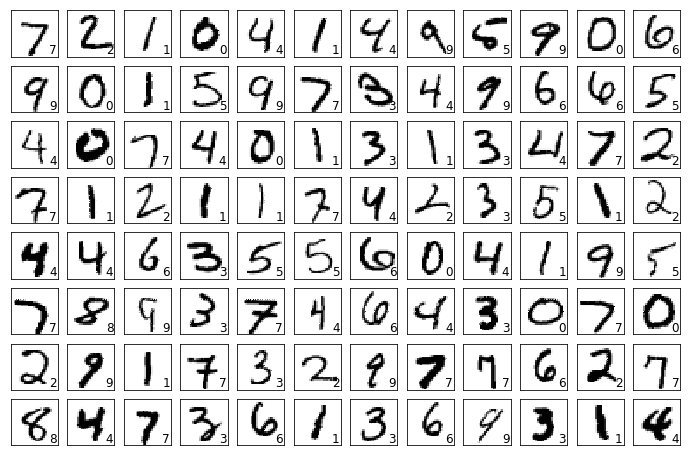

In [11]:
show_prediction()
plt.show()